In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.neural_network import MLPClassifier

import numpy as nmp 
from sklearn.impute import SimpleImputer

import missingno as msno

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

from scipy import stats
from scipy.stats import mode

import pickle

# ИСХОДНЫЕ ДАННЫЕ

## 1. ИССЛЕДОВАНИЕ ИСХОДНОГО ФАЙЛА 'ga_hits.csv'

Проверен файл с расширением .pkl, его содержание аналогично, поэтому сразу работаем с ga_hits.csv

In [206]:
df_out= pd.read_csv('data/ga_hits.csv')

Содержание таблицы и ее размерность

In [208]:
print(df_out.shape)
df_out.head()

(15726470, 11)


,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


Состав столбцов таблицы

In [209]:
print(df_out.columns)

Index(['session_id', 'hit_date', 'hit_time', 'hit_number', 'hit_type',
       'hit_referer', 'hit_page_path', 'event_category', 'event_action',
       'event_label', 'event_value'],
      dtype='object')


ga_hits.csv  - одна строка = одно событие в рамках одного визита на сайт

1. session_id - ID визита
2. hit_date  - дата события
3. hit_time - время события 
4. hit_number - порядковый номер события в рамках сессии
5. hit_type - тип события
6. hit_referer - источник события
7. hit_page_path - страница события
8. event_category - тип действия
9. event_action - действие
10. event_label - тег действия
11. event_value - значение результата действия

In [210]:
print('Информация о выборке:\n')
df_out.info()

Информация о выборке:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [6]:
# Смотрим содержание таблицы: количество уникальных значений в столбцах, их список

for column in df_out:
    print('')
    print('Характеристика:', column)
    uniqvalue = df_out[column].nunique()
    print('Количество уникальных значений: ', uniqvalue)
    print('Список значений: ',  df_out[column].value_counts())


Характеристика: session_id
Количество уникальных значений:  1734610
Список значений:  5442565791571325612.1632449195.1632449195    768
6568868914238486437.1632270313.1632270313    678
5959671972744778783.1632490527.1632490600    548
7452598043578978502.1632358598.1632358598    514
3070792010704358528.1629752408.1629752408    498
                                            ... 
4570994095441102117.1630324006.1630324006      1
768506153535315810.1630314342.1630314342       1
5517253735248338264.1630315080.1630315080      1
4054272189286640867.1630334209.1630334209      1
5381267721977892188.1640271196.1640271196      1
Name: session_id, Length: 1734610, dtype: int64

Характеристика: hit_date
Количество уникальных значений:  226
Список значений:  2021-05-24    513035
2021-12-21    280192
2021-05-25    235805
2021-09-23    168899
2021-05-26    158382
               ...  
2021-07-24     23490
2021-05-23     18773
2021-05-19     14605
2021-05-22     13917
2021-05-21     13497
Name: hit_date

<AxesSubplot:>

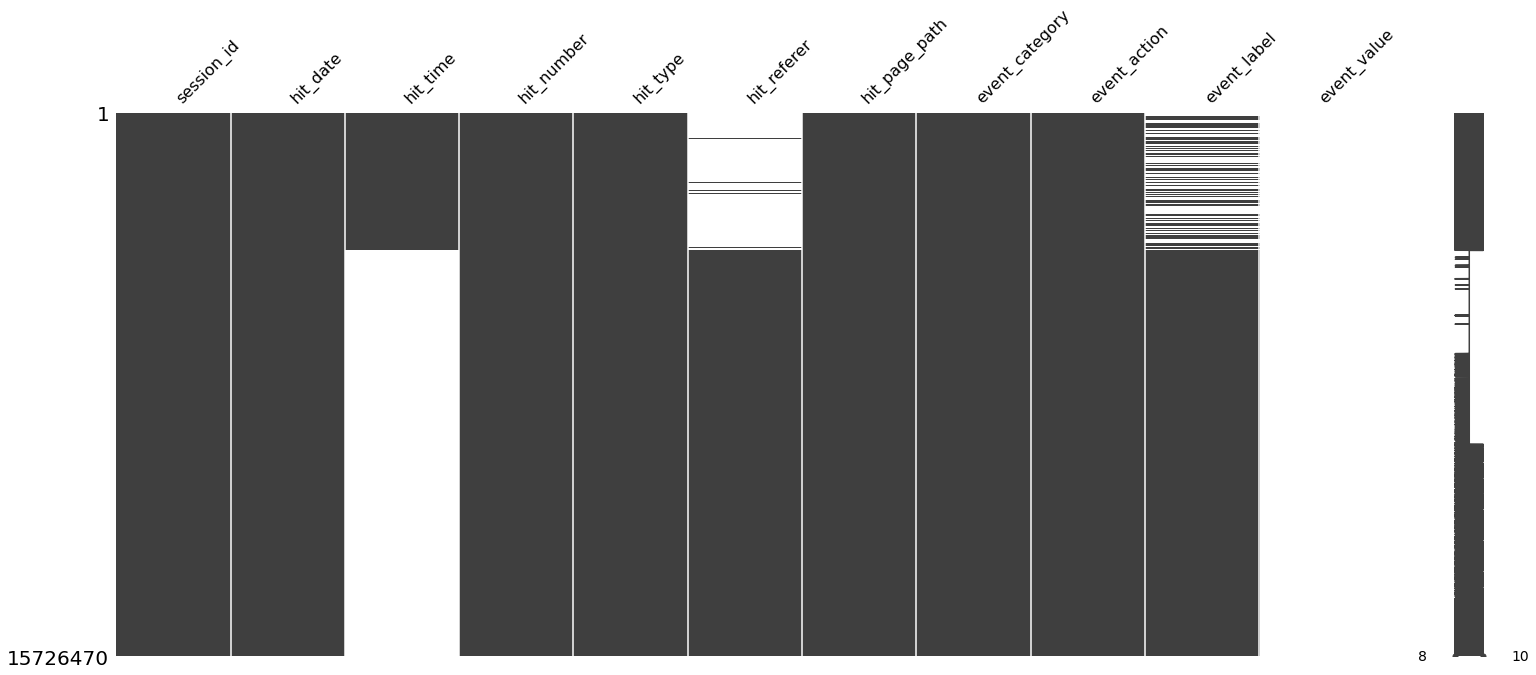

In [7]:
# Изучаем визуальное отображение полноты данных таблицы

msno.matrix(df_out)

In [211]:
# Проверим количество пропущенных значений по столбцам

missing_values = ((df_out.isna().sum()/len(df_out))*100).sort_values(ascending=False)
print('Процент пропущенных значений: ')
missing_values

Процент пропущенных значений: 


event_value       100.000000
hit_time           58.247795
hit_referer        39.899634
event_label        23.909905
session_id          0.000000
hit_date            0.000000
hit_number          0.000000
hit_type            0.000000
hit_page_path       0.000000
event_category      0.000000
event_action        0.000000
dtype: float64

In [212]:
# Перечень столбцов с пропущенными значениями

missing_val = missing_values[missing_values.values > 0].index.tolist()
missing_val

['event_value', 'hit_time', 'hit_referer', 'event_label']

- 7 колонок из 11 заполнены на 100%

- 4 колонки не заполнены полностью (от 24 до 100%)

- колонка event_value не заполнена совсем (100% данных отсутствуют)

Все четыре колонки ('event_value', 'hit_time', 'hit_referer', 'event_label') для дальнейших действий не нужны,
поэтому их можно удалить

### 1.1.  Заполнение таблицы для работы, проверка качества заполнения, расчет параметра CR ('ga_hits.csv')

### 1.1.1. Удаляем столбцы с пропущенными данными, проверяем итоговую размерность таблицы, а также процент заполнения выборки

In [213]:
columns_for_drop = ['event_value', 'hit_time', 'hit_referer', 'event_label']
df_prepared = df_out.drop(df_out[columns_for_drop], axis =1)
print(df_prepared.shape)

(15726470, 7)


In [214]:
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки: ', len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки: ', round(len(df.dropna())/len(df) * 100, 2))

In [13]:
print_useful_rows_info(df_prepared)

Количество полностью заполненных объектов из всей выборки:  15726470
Процент полностью заполненных объектов из всей выборки:  100.0


### 1.1.2. Формируем столбец CR (Convercion Rate) - конверсия из визита в любое целевое действие из списка:  

Целевое действие — события типа «Оставить заявку» и «Заказать звонок» 
- (ga_hits.event_action in ['sub_car_claim_click', 'sub_car_claim_submit_click', 
'sub_open_dialog_click', 'sub_custom_question_submit_click', 
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']

In [15]:
print('Список значений: ', df_prepared['event_action'].value_counts())

Список значений:  view_card                     3558985
view_new_card                 3551009
sub_landing                   1798117
go_to_car_card                 973666
sub_view_cars_click            791515
                               ...   
click_on_android                    1
new_year_road_help_btn              1
titul_page_view                     1
show_pos_status_declined            1
survey_buy_after_sell_when          1
Name: event_action, Length: 230, dtype: int64


In [215]:
df_prepared['CR'] = [1 if (x == 'sub_car_claim_click' or x =='sub_car_claim_submit_click' or x =='sub_open_dialog_click'
    or x =='sub_custom_question_submit_click' or x =='sub_call_number_click'
    or x =='sub_callback_submit_click' or x =='sub_submit_success' or x =='sub_car_request_submit_click')
    else 0 for x in df_prepared['event_action']]
print(df_prepared.shape)
df_prepared.head(10)

(15726470, 8)


,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,CR
0,5639623078712724064.1640254056.1640254056,2021-12-23,30,event,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,0
1,7750352294969115059.1640271109.1640271109,2021-12-23,41,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,0
2,885342191847998240.1640235807.1640235807,2021-12-23,49,event,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,0
3,142526202120934167.1640211014.1640211014,2021-12-23,46,event,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,0
4,3450086108837475701.1640265078.1640265078,2021-12-23,79,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,0
5,6466333295973247896.1640246168.1640246168,2021-12-23,41,event,sberauto.com/cars?utm_source_initial=youtube&u...,quiz,quiz_show,0
6,281215510786615563.1640245516.1640245516,2021-12-23,102,event,sberauto.com/cars/toyota?isnew=false&rental_ca...,quiz,quiz_show,0
7,4024492994895054107.1640269084.1640269084,2021-12-23,85,event,sberauto.com/cars/all/mercedes-benz/glc/f8f330...,quiz,quiz_show,0
8,555009234841130092.1640256620.1640256620,2021-12-23,101,event,sberauto.com/cars/all/kia/sorento/c38179cb?utm...,quiz,quiz_show,0
9,2692901778487480807.1640206845.1640206845,2021-12-23,1,event,sberauto.com/cars/all/nissan/x-trail/0744675f?...,card_web,view_card,0


Проверяем количество целевых действий и их уникальность 

In [17]:
print('Количество уникальных значений: ', df_prepared['CR'].nunique())
print('Список значений: ',  df_prepared['CR'].value_counts())

Количество уникальных значений:  2
Список значений:  0    15621562
1      104908
Name: CR, dtype: int64


Целевых действий из 15 726 470    ---  всего лишь 104 908, т.е. 0,67%

Сохраняем таблицу в csv

In [19]:
df_prepared.to_csv('data/df_prepared.csv', index=False)

###  1.2.  Группируем по id и считаем CR  ('ga_hits.csv')

Для работы принимаем значение 'CR_sum', 'CR_count' принимаем к сведению

In [ ]:
df_prepared = pd.read_csv('data/df_prepared.csv')

In [216]:
df_group_CR_sum = df_prepared.groupby('session_id')['CR'].sum().reset_index(name='CR_sum').sort_values(['CR_sum'], ascending=False)
print(df_group_CR_sum.shape)
df_group_CR_sum.head(20)

(1734610, 2)


,session_id,CR_sum
1281576,7140505447604038223.1630415440.1630415440,474
286145,2375944964542858067.1635025747.1635025747,83
676515,4245963133837464050.1640882501.1640882501,81
1697608,9126246154865944745.1636772009.1636772009,74
1485462,8112688049712084307.1621439828.1621439828,73
1361414,7518333712042258254.1636462243.1636462243,67
1361639,7518333712042258254.1639563879.1639563879,50
53876,1259773107082089014.1631048249.1631048249,49
1255848,701680538324125081.1622735271.1622735271,48
1710817,9188187984229163017.1635639790.1635639790,47


In [24]:
# Сохраняем сгруппированный CR в файл csv

df_group_CR_sum.to_csv('data/df_group_CR_sum.csv', index=False)

In [25]:
# Считаем количество CR, принимаем к сведению

df__ = df_prepared.groupby(['session_id', 'CR']).size().reset_index(name='CR_count').sort_values(['CR_count'], ascending=False)
print(df__.shape)
df__.head(20)

(1784748, 3)


,session_id,CR,CR_count
953961,5442565791571325612.1632449195.1632449195,0,768
1196411,6568868914238486437.1632270313.1632270313,0,678
1064933,5959671972744778783.1632490527.1632490600,0,548
1385934,7452598043578978502.1632358598.1632358598,0,514
444066,3070792010704358528.1629752408.1629752408,0,498
1528922,8115026869866033734.1629319807.1629319807,0,496
1254760,6841198707279638061.1631825458.1631825458,0,496
587483,3740600179229362264.1639614533.1639614533,0,496
1258900,686125592720823356.1634587719.1634587719,0,496
40792,1191055000444557028.1634948839.1634948839,0,492


### 1.3. Выделяем название марки и модели авто и сохраняем результат в файл 'data/df_prepared_auto.csv'

In [ ]:
df_prepared = pd.read_csv('data/df_prepared.csv')

In [217]:
print(df_prepared.shape)
df_prepared.head()

(15726470, 8)


,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,CR
0,5639623078712724064.1640254056.1640254056,2021-12-23,30,event,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,0
1,7750352294969115059.1640271109.1640271109,2021-12-23,41,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,0
2,885342191847998240.1640235807.1640235807,2021-12-23,49,event,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,0
3,142526202120934167.1640211014.1640211014,2021-12-23,46,event,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,0
4,3450086108837475701.1640265078.1640265078,2021-12-23,79,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,0


In [218]:
def model_au(s):
    if len(s.split(sep=('/'))) >= 3:  
        if s.split(sep=('/'))[1] == 'cars':
            if s.split(sep=('/'))[2] == 'all':
                model_ = s.split(sep=('/'))[3]+' '+s.split(sep=('/'))[4]
                if len(model_)!= 8:
                    return model_
                else :
                    model_ = 'none'
                    return model_
            else :
                str_list = s.split(sep='?')[0]
                model_ = str_list.split(sep=('/'))[2]
                if len(model_) != 8:
                    return model_
                else:
                    model_ = 'none'
                    return model_
        else :
            model_ = 'none'
            return model_
    else :
        model_ = 'none'
        return model_

In [220]:
df_prepared['model_auto'] = df_prepared['hit_page_path'].apply(model_au)
df_prepared.head()

,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,CR,model_auto
0,5639623078712724064.1640254056.1640254056,2021-12-23,30,event,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,0,none
1,7750352294969115059.1640271109.1640271109,2021-12-23,41,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,0,fiat
2,885342191847998240.1640235807.1640235807,2021-12-23,49,event,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,0,volkswagen polo
3,142526202120934167.1640211014.1640211014,2021-12-23,46,event,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,0,none
4,3450086108837475701.1640265078.1640265078,2021-12-23,79,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,0,mercedes-benz cla-klasse


In [221]:
df_prepared_auto = df_prepared
df_prepared_auto.to_csv('data/df_prepared_auto.csv', index=False)

In [222]:
print('Количество уникальных значений: ', df_prepared_auto['model_auto'].nunique())
print('Список значений: ',  df_prepared_auto['model_auto'].value_counts())

Количество уникальных значений:  148
Список значений:  none               12217738
skoda rapid          442513
lada-vaz vesta       403910
volkswagen polo      318075
skoda karoq          194273
                     ...   
saab                      1
ravon                     1
haima                     1
seat                      1
dacia                     1
Name: model_auto, Length: 148, dtype: int64


### 1.4. Группируем по марке и модели авто и сортируем по убыванию

In [224]:
df_ = df_prepared_auto.groupby(['model_auto']).size().reset_index(name='model_count')
df_auto = df_.sort_values(by = 'model_count',ascending=False)
print(df_auto.shape)
df_auto.head()

(148, 2)


,model_auto,model_count
98,none,12217738
122,skoda rapid,442513
68,lada-vaz vesta,403910
139,volkswagen polo,318075
119,skoda karoq,194273


In [225]:
# Исключаем из выборки для увеличения скорости обработки данных строки с нулевым значением марки авто (= 'none')

df_auto_without_none = df_prepared_auto.drop(df_prepared_auto[(df_prepared_auto.model_auto == 'none')].index)
df_auto_without_none_ = df_auto_without_none.drop(df_auto_without_none[(df_auto_without_none.model_auto == '')].index) 

In [226]:
print(df_auto_without_none_.shape)
df_auto_without_none_.head()

(3508675, 9)


,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,CR,model_auto
1,7750352294969115059.1640271109.1640271109,2021-12-23,41,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,0,fiat
2,885342191847998240.1640235807.1640235807,2021-12-23,49,event,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,0,volkswagen polo
4,3450086108837475701.1640265078.1640265078,2021-12-23,79,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,0,mercedes-benz cla-klasse
6,281215510786615563.1640245516.1640245516,2021-12-23,102,event,sberauto.com/cars/toyota?isnew=false&rental_ca...,quiz,quiz_show,0,toyota
7,4024492994895054107.1640269084.1640269084,2021-12-23,85,event,sberauto.com/cars/all/mercedes-benz/glc/f8f330...,quiz,quiz_show,0,mercedes-benz glc


In [ ]:
# Сохраняем в файл исходный для анализа файл с марками авто и CR

df_auto_without_none_.to_csv('data/df_auto_without_none_.csv', index=False)

## 2.  ИССЛЕДОВАНИЕ ИСХОДНОГО ФАЙЛА 'ga_sessions.csv'

Проверен файл с расширением .pkl, его содержание аналогично, поэтому сразу работаем с ga_sessions.csv

In [227]:
df_ga_sessions= pd.read_csv('data/ga_sessions.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_11320\3424144613.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ga_sessions= pd.read_csv('data/ga_sessions.csv')


In [228]:
print(df_ga_sessions.shape)
df_ga_sessions.head()

(1860042, 18)


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


### 2.1.  Объединяем с таблицей группировки по CR, сформированный из ga_hits по ключу

#### При объединении используем полную группировку  'outer'

Количество строк увеличилось до 1 862 386

In [229]:
df_join = pd.merge(df_ga_sessions, df_group_CR_sum, how='outer', indicator=True) 

In [29]:
print(df_join.shape)
df_join.head()

(1862386, 20)


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,_merge
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0.0,both
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1.0,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0.0,both
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1.0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0.0,both
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1.0,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0.0,both
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2.0,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0.0,both


In [30]:
# Приводим перечень столбцов

print(df_join.columns)

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'CR_sum', '_merge'],
      dtype='object')


In [31]:
# Изучаем состав столбца, сфомированного по итогам объединения -  '_merge'

print('Количество уникальных значений: ', df_join['_merge'].nunique())
print('Список значений: ',  df_join['_merge'].value_counts())

Количество уникальных значений:  3
Список значений:  both          1732266
left_only      127776
right_only       2344
Name: _merge, dtype: int64


In [32]:
# Сохраним результаты объединения в файл csv (на всякий случай) 

df_join.to_csv('data/df_join.csv', index=False)


Как видно из столбца '_merge' почти 6% строк обеих таблиц не объединились полностью

Так как признак CR является основным, на котором строится вся аналитика, следует исключить все строки, в которых нет данной информации, т.е. 'session_id',  которые были в таблице 'ga_sessions.csv', но не было в таблице 'ga_hits.csv'.

#### Поэтому снова сделаем объединение таблиц  с признаком 'inner'

In [230]:
df_join_ = pd.merge(df_ga_sessions, df_group_CR_sum, how='inner', indicator=True) 

In [231]:
print(df_join_.shape)
df_join_.head()

(1732266, 20)


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,_merge
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0,both
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0,both
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0,both
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0,both
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0,both


In [36]:
# Проверим столбец '_merge'. Итоговое количество строк объединения обеих таблиц - 1 732 266

print('Количество уникальных значений: ', df_join_['_merge'].nunique())
print('Список значений: ',  df_join_['_merge'].value_counts())

Количество уникальных значений:  1
Список значений:  both          1732266
left_only           0
right_only          0
Name: _merge, dtype: int64


In [37]:
# Сохраним результаты объединения в файл csv (на всякий случай) 

df_join_.to_csv('data/df_join_.csv', index=False)

##  3.  DATA CLEANING 
### 3.1. Описание данных в таблице, информации в столбцах и их содержимого

ga_sessions.csv - одна строка = один визит на сайт

1. session_id - ID визита
2. client_id - ID посетителя
3. visit_date - дата визита
4. visit_time - время визита
5. visit_number - порядковый номер визита клиента
6. utm_source - канал привлечения
7. utm_medium - тип привлечения
8. utm_campaign - рекламная кампания
9. utm_adcontent - ключевое слово
10. utm_keyword - тип устройства
11. device_category - ОС устройства
12. device_os - марка ОС устройства
13. device_brand - марка устройства
14. device_model - модель устройства
15. device_screen_resolution - разрешение экрана
16. device_browser - браузер
17. geo_country - страна
18. geo_city - город

df_join.csv + еще два столбца к таблице ga_sessions.csv

19. CR_sum - город
20. _merge - результат объединения таблиц - both - объединены по id, (left_only - есть в таблице ga_sessions, но нет в таблице df_group_CR_sum, и наоборот right_only - есть в таблице f_group_CR_sum, но нет в ga_sessions)

In [3]:
df_join_= pd.read_csv('data/df_join_.csv')

In [232]:
print('Информация о выборке:\n')
df_join_.info()

Информация о выборке:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1732266 entries, 0 to 1732265
Data columns (total 20 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   session_id                object  
 1   client_id                 object  
 2   visit_date                object  
 3   visit_time                object  
 4   visit_number              int64   
 5   utm_source                object  
 6   utm_medium                object  
 7   utm_campaign              object  
 8   utm_adcontent             object  
 9   utm_keyword               object  
 10  device_category           object  
 11  device_os                 object  
 12  device_brand              object  
 13  device_model              object  
 14  device_screen_resolution  object  
 15  device_browser            object  
 16  geo_country               object  
 17  geo_city                  object  
 18  CR_sum                    int64   
 19  _merge             

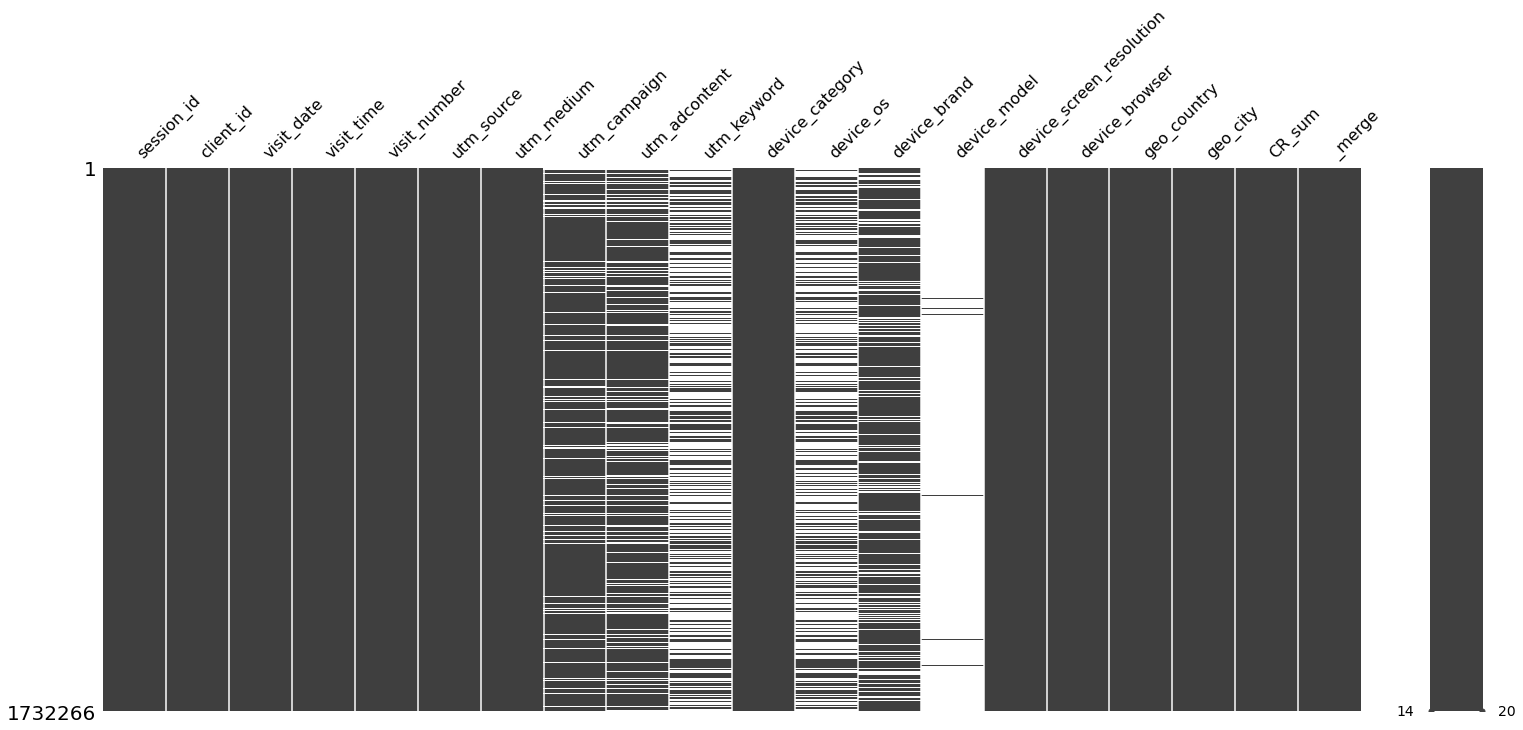

In [233]:
# Визуально посмотрим информацию в столбцах на предмет отсутствующих данных

msno.matrix(df_join_);

In [234]:
# Изучаем характеристики столбцов таблицы и их значений

for column in df_join_:
    print('')
    print('Характеристика:', column)
    uniqvalue = df_join_[column].nunique()
    print('Количество уникальных значений: ', uniqvalue)
    print('Список значений: ',  df_join_[column].value_counts()) 


Характеристика: session_id
Количество уникальных значений:  1732266
Список значений:  9055434745589932991.1637753792.1637753792    1
629529258169981545.1626332167.1626332167     1
6295352713792576176.1634065074.1634065074    1
6295350622136026841.1626588901.1626588901    1
6295349887709233242.1639202906.1639202906    1
                                            ..
3524000133754500026.1625142208.1625142208    1
3523993785803856201.1636161866.1636161866    1
352398731068897298.1621686290.1621686290     1
3523985479341028705.1640084833.1640084833    1
9055430416266113553.1640968742.1640968742    1
Name: session_id, Length: 1732266, dtype: int64

Характеристика: client_id
Количество уникальных значений:  1320702
Список значений:  1.750498e+09    449
1.266575e+09    303
7.368596e+08    301
1.894772e+09    270
1.065182e+09    256
               ... 
8.760138e+08      1
8.760135e+07      1
8.760101e+07      1
8.760069e+08      1
2.108382e+09      1
Name: client_id, Length: 1320702, dtype: i

Количество уникальных значений:  2389
Список значений:  Moscow              750928
Saint Petersburg    278402
(not set)            73297
Yekaterinburg        33555
Krasnodar            30260
                     ...  
Oldbury                  1
Bad Breisig              1
Ilza                     1
Svishtov                 1
Compiegne                1
Name: geo_city, Length: 2389, dtype: int64

Характеристика: CR_sum
Количество уникальных значений:  52
Список значений:  0      1681952
1        27273
3        11232
2         6955
4         2520
6          809
5          809
7          210
8          117
9          104
10          73
12          29
11          22
14          19
18          17
13          13
16          10
24           8
22           8
17           7
21           7
35           6
23           6
20           6
19           6
27           5
25           5
15           4
39           3
30           3
28           3
38           2
26           2
42           2
33           2
6

### 3.2.1.   Проверка отсутствующих данных

In [235]:
# Процентное описание пропущенных данных в столбцах

missing_values = ((df_join_.isna().sum()/len(df_join_))*100).sort_values(ascending=False)
print('Процент пропущенных значений: ')
missing_values

Процент пропущенных значений: 


device_model                99.130503
utm_keyword                 58.925823
device_os                   58.533966
device_brand                20.042880
utm_adcontent               17.557177
utm_campaign                11.273500
utm_source                   0.004387
session_id                   0.000000
CR_sum                       0.000000
geo_city                     0.000000
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_category              0.000000
client_id                    0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
_merge                       0.000000
dtype: float64

In [236]:
# Перечень столбцов с отсутствующими данными

missing_val = missing_values[missing_values.values > 0].index.tolist()
missing_val

['device_model',
 'utm_keyword',
 'device_os',
 'device_brand',
 'utm_adcontent',
 'utm_campaign',
 'utm_source']

- 13 колонок из 20 заполнены на 100%
- 7 колонок не заполнены полностью (от 0,5 до 99%)
- колонка 'device_model' почти не заполнена (99,1% данных отсутствуют) - подлежит удалению
- колонка '_merge' - вспомогательная, можно удалить
- 'utm_keyword' (59% данных отсутствуют), 'device_os'(59% данных отсутствуют) - много отсутствующих данных, можно удалить

In [4]:
# Удаляем 4 колонок, общее количество колонок в таблице остается 15, сохраняем таблицу

df_clean = df_join_.drop(columns=['device_model','_merge', 'utm_keyword', 'device_os'])
print(df_clean.shape)

(1732266, 16)


### 3.2.2.  Проверка объема нулевых значений по столбцам таблицы, т.е. равных '(not set)' или 'none'

In [73]:
def check_missing_values (df):
    df_ = list(df.columns)
    num = nmp.array(df_)
    c = len(df.columns)
    df__ = pd.DataFrame(num.reshape(c,1), columns=['columns'])
    result = []
    for column in df:
        missing_values = ((len(df[((df[column]=='(not set)') | (df[column]=='none') | (df[column]=='(none)'))])/len(df))*100)
        result.append(missing_values)  
    df__['result']=result
    print('Проверка % нулевых значений объектов из всей выборки (проверка нулевых данных): ')
    return df__.sort_values('result', ascending=False)

In [240]:
check_missing_values (df_clean)

Проверка % нулевых значений объектов из всей выборки (проверка нулевых данных): 


,columns,result
6,utm_medium,16.017459
14,geo_city,4.231279
10,device_brand,0.946275
13,geo_country,0.061827
12,device_browser,0.000635
0,session_id,0.000000
1,client_id,0.000000
2,visit_date,0.000000
3,visit_time,0.000000
4,visit_number,0.000000


Из 15 столбцов в 5 наблюдаются нулевые значения

Как видно, наибольшее количество нулевые значений в столбцах 'utm_medium' и 'geo_city', и они нужны для работы 

### 3.3. Блок функций для последующих действий

In [5]:
######################### Замена отсутствующих данных на значение другого столбца этой же таблицы и проверка результата
# пустые значения df1 меняем на значения df2

def replace_isna_data (df1,df2):                             
    df1= df1.fillna(df2)
    print('Итоговый процент отсутствующих значений после замены: ', (df1.isna().sum()/(len(df1)))*100)
    return df1

In [6]:
######################## Замена отсутствующих данных на моду всего столбца и проверка результата

def replace_isna_data_all_column_mode(df):
    x = df.mode()[0]
    df = df.fillna(x)
    print("Итоговый процент отсутствующих значений после замены на моду столбца - ", df.isna().sum())
    return df

In [7]:
######################## Замена нулевых значений, т.е. равных '(not set)' или 'none',на моду всего столбца 

def replace_missing_data_all_column_mode(df):
    x = df.mode()[0]
    df = df.replace(['(not set)', 'none','(none)'], x) 
    return df

In [8]:
######################## Проверка наличия нулевых значений в столбце, т.е. равных '(not set)' или 'none'

def missing_value (df):
    missing_value = ((len(df[((df=='(not set)') | (df=='none') | (df=='(none)'))])/len(df))*100)
    return print('Процент пропущенных значений: ', missing_value)

In [9]:
######################### Проверка наличия только числовых значений в текстовой ячейке столбца таблицы

def numer(df):
    g = 0
    for i in range(len(df)):
        if df[i].isnumeric() == True:
            g = g+1
        else:
            g = g+0
    return (print('Числовых значений нет') if g == 0  else print(('Числовых значений - '), g))

In [10]:
########################## Проверяем процент полностью заполненных объектов в итоговой таблице

def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки: ', len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки: ', round(len(df.dropna())/len(df) * 100, 2))

### 3.4. Работа со столбцами таблицы

### 3.4.1.   Работа с данными столбца 'utm_source'

'utm_source' - канал привлечения, отсутствуют 0,4% данных, нулевых данных нет, 

Заменим пропущенные значения на моды столбца, сформированные через группировку по столбцу 'utm_adcontent'

In [11]:
df_utm_source = df_clean.groupby('utm_adcontent')['utm_source'].agg(utm_source_mode =pd.Series.mode)
print(df_utm_source.shape)
df_utm_source.head(2) 

(280, 1)


,utm_source_mode
utm_adcontent,
AByCsfZNGxnFrQkYzVAq,kjsLglQLzykiRbcDiGcD
AIONnJpjXjEluFHEjOyg,jaSOmLICuBzCFqHfBdRg


In [12]:
df_utm_source.utm_source_mode.isna().sum()

0

In [13]:
df_clean = df_clean.merge(df_utm_source, on = 'utm_adcontent', how='outer', indicator=False)

In [14]:
df_clean.head(3) 

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,utm_source_mode
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0,ZpYIoDJMcFzVoPFsHGJL
1,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,ZpYIoDJMcFzVoPFsHGJL
2,9055462349345527315.1638536723.1638536723,2.108389e+09,2021-12-03,16:05:23,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Apple,390x844,Safari,Russia,Moscow,0,ZpYIoDJMcFzVoPFsHGJL


In [15]:
df_clean['utm_source'] = replace_isna_data (df_clean['utm_source'],df_clean['utm_source_mode'])

Итоговый процент отсутствующих значений после замены:  0.0020782027702442927


In [16]:
# Количество пустых 'utm_source' уменьшилось, но не обнулилось. Заменим оставшиеся на моду всего столбца

df_clean['utm_source'] = replace_isna_data_all_column_mode(df_clean['utm_source'])

Итоговый процент отсутствующих значений после замены на моду столбца -  0


In [17]:
df_clean.utm_source.isna().sum()

0

### 3.4.2. Работа с данными столбца 'utm_campaign'
'utm_campaign' - рекламная кампания, отсутствуют 11,2% данных, нулевых значений нет

In [18]:
# Проверяем целесообразность группировки по столбцам, выбираем для группировки столбец 'utm_source'

df1 = df_clean.query('utm_campaign=="LEoPHuyFvzoNfnzGgfcd"')
df1[0:3]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,utm_source_mode
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0,ZpYIoDJMcFzVoPFsHGJL
1,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,ZpYIoDJMcFzVoPFsHGJL
2,9055462349345527315.1638536723.1638536723,2.108389e+09,2021-12-03,16:05:23,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Apple,390x844,Safari,Russia,Moscow,0,ZpYIoDJMcFzVoPFsHGJL


In [19]:
print('Количество уникальных значений: ', df1['utm_source'].nunique())
print('Список значений: ',  df1['utm_source'].value_counts())

Количество уникальных значений:  2
Список значений:  ZpYIoDJMcFzVoPFsHGJL    320071
bByPQxmDaMXgpHeypKSM      1215
Name: utm_source, dtype: int64


Заменим отсутствующие значения на моды столбца, сформированные через группировку по столбцу 'utm_source'

In [20]:
df_utm_campaign = df_clean.groupby('utm_source')['utm_campaign'].agg(utm_campaign_mode =pd.Series.mode)
print(df_utm_campaign.shape)
df_utm_campaign.head(2) 

(280, 1)


,utm_campaign_mode
utm_source,
AHgbtEjTEsiUMJouiDYS,LTuZkdKfxRGVceoWkVyg
ANoZJgYuPrWNkAAchryx,LTuZkdKfxRGVceoWkVyg


In [21]:
df_clean = df_clean.merge(df_utm_campaign, on = 'utm_source', how='outer', indicator=False)
df_clean.head(2) 

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,utm_source_mode,utm_campaign_mode
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd
1,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd


In [22]:
df_clean['utm_campaign'] = replace_isna_data (df_clean['utm_campaign'],df_clean['utm_campaign_mode'])

Итоговый процент отсутствующих значений после замены:  0.0


### 3.4.3.  Работа с данными столбца 'utm_adcontent'

'utm_adcontent' - марка устройства, отсутствуют 17,6% данных, нулевых данных нет

In [23]:
# Проверяем целесообразность группировки по столбцам, выбираем 'utm_source'

df2 = df_clean.query('utm_adcontent=="vCIpmpaGBnIQhyYNkXqp"')
df2[0:3]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,utm_source_mode,utm_campaign_mode
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd
1,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd
2,9055462349345527315.1638536723.1638536723,2.108389e+09,2021-12-03,16:05:23,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Apple,390x844,Safari,Russia,Moscow,0,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd


In [24]:
print('Количество уникальных значений: ', df2['utm_source'].nunique())
print('Список значений: ',  df2['utm_source'].value_counts())

Количество уникальных значений:  2
Список значений:  ZpYIoDJMcFzVoPFsHGJL    179151
bByPQxmDaMXgpHeypKSM       287
Name: utm_source, dtype: int64


Заменим отсутствующие значения на моды столбца, сформированные через группировку по столбцу 'utm_source'

In [25]:
df_utm_adcontent = df_clean.groupby('utm_source')['utm_adcontent'].agg(utm_adcontent_mode =pd.Series.mode)
print(df_utm_adcontent.shape)
df_utm_adcontent.head(2) 

(280, 1)


,utm_adcontent_mode
utm_source,
AHgbtEjTEsiUMJouiDYS,JNHcPlZPxEMWDnRiyoBf
ANoZJgYuPrWNkAAchryx,JNHcPlZPxEMWDnRiyoBf


In [26]:
df_clean = df_clean.merge(df_utm_adcontent, on = 'utm_source', how='outer', indicator=False)
df_clean.head(2) 

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,utm_source_mode,utm_campaign_mode,utm_adcontent_mode
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf
1,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf


In [27]:
df_clean['utm_adcontent'] = replace_isna_data (df_clean['utm_adcontent'],df_clean['utm_adcontent_mode'])

Итоговый процент отсутствующих значений после замены:  0.0


In [28]:
df_clean['utm_adcontent'].isna().sum()

0

### 3.4.4.  Работа с данными столбца 'device_brand'

'device_brand' - марка устройства, отсутствуют 20% данных, нулевых 0,95% данных

In [29]:
# Проверяем целесообразность группировки по столбцам, выбираем 'device_category'

df3= df_clean.query('device_brand=="Huawei"')
df3[0:3]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,utm_source_mode,utm_campaign_mode,utm_adcontent_mode
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf
1,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf
4,9055491722626447422.1638119489.1638119489,2.108396e+09,2021-11-28,20:11:29,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x780,Chrome,Russia,Saint Petersburg,0,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf


In [30]:
print('Количество уникальных значений: ', df3['device_category'].nunique())
print('Список значений: ',  df3['device_category'].value_counts())

Количество уникальных значений:  3
Список значений:  mobile     170591
tablet       3218
desktop        19
Name: device_category, dtype: int64


Определим моды столбца, сформированные через группировку по столбцу 'device_category'

In [31]:
df_device_brand = df_clean.groupby('device_category')['device_brand'].agg(device_brand_mode =pd.Series.mode)
print(df_device_brand.shape)
df_device_brand.head() 

(3, 1)


,device_brand_mode
device_category,
desktop,Apple
mobile,Apple
tablet,Apple


In [32]:
# Так как мода по всем 'device_category' получилась одинаковой - Apple, то сделаем замену все отсутствующих значений
# 'device_brand' на единую моду столбца 

In [33]:
df_clean['device_brand'] = replace_isna_data_all_column_mode(df_clean['device_brand'])

Итоговый процент отсутствующих значений после замены на моду столбца -  0


In [34]:
# По той же логике заменим все нулевые значения 'device_brand' на единую моду столбца и проверим результат

In [35]:
df_clean['device_brand'] = replace_missing_data_all_column_mode(df_clean['device_brand'])
missing_value(df_clean['device_brand'])

Процент пропущенных значений:  0.0


### 3.4.5.  Работа с данными столбца 'utm_medium'

'utm_medium' - тип привлечения, нулевые 16% данных, отсутствующих данных нет

In [36]:
# Проверяем целесообразность группировки по столбцам, выбираем 'utm_source'

df4= df_clean.query('utm_medium=="smm"')
df4[0:3]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,utm_source_mode,utm_campaign_mode,utm_adcontent_mode
1213305,1394030988737011974.1636720906.1636720906,3.245731e+08,2021-11-12,15:41:46,1,QxAxdyPLuQMEcrdZWdWb,smm,vRLTQQKAsFQMxbcHGPhu,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,360x720,Android Webview,Russia,Moscow,0,ZpYIoDJMcFzVoPFsHGJL,vRLTQQKAsFQMxbcHGPhu,JNHcPlZPxEMWDnRiyoBf
1213350,143667984832492292.1636397830.1636397830,3.345031e+07,2021-11-08,21:57:10,1,QxAxdyPLuQMEcrdZWdWb,smm,vRLTQQKAsFQMxbcHGPhu,JNHcPlZPxEMWDnRiyoBf,tablet,Apple,820x1180,Safari (in-app),Russia,Saint Petersburg,0,ZpYIoDJMcFzVoPFsHGJL,vRLTQQKAsFQMxbcHGPhu,JNHcPlZPxEMWDnRiyoBf
1213351,143667984832492292.1636464902.1636464902,3.345031e+07,2021-11-09,16:35:02,2,QxAxdyPLuQMEcrdZWdWb,smm,vRLTQQKAsFQMxbcHGPhu,JNHcPlZPxEMWDnRiyoBf,tablet,Apple,820x1180,Safari (in-app),Russia,Saint Petersburg,0,ZpYIoDJMcFzVoPFsHGJL,vRLTQQKAsFQMxbcHGPhu,JNHcPlZPxEMWDnRiyoBf


In [37]:
print('Количество уникальных значений: ', df4['utm_source'].nunique())
print('Список значений: ',  df4['utm_source'].value_counts())

Количество уникальных значений:  3
Список значений:  ISrKoXQCxqqYvAZICvjs    1023
iNFgfQPqHPBuvGCYtrQE     139
QxAxdyPLuQMEcrdZWdWb      32
Name: utm_source, dtype: int64


In [38]:
# определим моды столбца, сформированные через группировку по столбцу 'utm_source'

In [39]:
df_utm_medium = df_clean.groupby('utm_source')['utm_medium'].agg(utm_medium_mode =pd.Series.mode)
print(df_utm_medium.shape)
df_utm_medium.head(3) 

(280, 1)


,utm_medium_mode
utm_source,
AHgbtEjTEsiUMJouiDYS,referral
ANoZJgYuPrWNkAAchryx,referral
ArbfvYgWhqxkzywKqpQf,referral


In [40]:
df_utm_medium.query(('utm_medium_mode=="(none)"')or ('utm_medium_mode=="(not set)"') or('utm_medium_mode=="none"'))
# есть проблема нулевой сгруппированной моды

,utm_medium_mode
utm_source,
fDLlAcSmythWSCVMvqvL,(none)


In [41]:
df_clean = df_clean.merge(df_utm_medium, on = 'utm_source', how='outer', indicator=False)

In [42]:
df_clean.head(3) 

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,utm_source_mode,utm_campaign_mode,utm_adcontent_mode,utm_medium_mode
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,banner
1,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,banner
2,9055462349345527315.1638536723.1638536723,2.108389e+09,2021-12-03,16:05:23,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Apple,390x844,Safari,Russia,Moscow,0,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,banner


In [43]:
idx = (df_clean.query(("utm_medium == '(not set)'") or ("utm_medium == '(none)'") or ("utm_medium == 'none'"))
         .index
         .to_series()
         .to_numpy())
df_clean.loc[idx, "utm_medium"] = df_clean.loc[idx, "utm_medium_mode"]

In [44]:
len(idx)

405

In [45]:
missing_value(df_clean['utm_medium'])

Процент пропущенных значений:  16.002796337283073


In [46]:
# Количество нулевых ячеек 'utm_medium'  уменьшилось, но незначительно,т.е. канал неизвестен, поэтому
# заменим оставшиеся на "other"

In [47]:
df_clean['utm_medium'] = df_clean['utm_medium'].replace(['(not set)', 'none','(none)'], "other")

In [48]:
missing_value(df_clean['utm_medium'])

Процент пропущенных значений:  0.0


### 3.4.6. Работа с данными столбца 'device_browser'

'device_browser' - браузер, нулевых 0.0006% данных, отсутствующих данных нет, 

Заменим нулевые значения на моду столбца

In [49]:
df_clean['device_browser']  = replace_missing_data_all_column_mode(df_clean['device_browser'])
missing_value(df_clean['device_browser'])

Процент пропущенных значений:  0.0


### 3.4.7. Работа с данными столбца 'geo_country'

'geo_country' - страна, нулевых 0,06% данных, отсутствующих данных нет 

Заменим нулевые значения на моду столбца

In [50]:
df_clean['geo_country']  = replace_missing_data_all_column_mode(df_clean['geo_country'])
missing_value(df_clean['geo_country'])

Процент пропущенных значений:  0.0


### 3.4.8.  Работа с данными столбца 'geo_city'

'geo_city' - город, нулевых 4,2% данных, отсутствующих данных нет, столбец группировки по смыслу - 'geo_country'

In [51]:
# определим моды столбца, сформированные через группировку по столбцу 'geo_country'

In [52]:
missing_value(df_clean['geo_city'])

Процент пропущенных значений:  4.231278568072109


In [53]:
df_geo_city = df_clean.groupby('geo_country')['geo_city'].agg(geo_city_mode =pd.Series.mode)
df_geo_city['geo_city_mode'] = df_geo_city['geo_city_mode'].astype('string')
df_geo_city.head(3)      

,geo_city_mode
geo_country,
Afghanistan,Kabul
Albania,Tirana
Algeria,(not set)


In [54]:
# Есть проблема нулевой моды при группировки, оценим ее объем

df5 = df_geo_city.query(('geo_city_mode=="(not set)"') or ('geo_city_mode=="(none)"') or ('geo_city_mode=="none"'))
print(df5.shape)
df5.head(3)

(39, 1)


,geo_city_mode
geo_country,
Algeria,(not set)
Andorra,(not set)
Antigua & Barbuda,(not set)


In [55]:
# Так как получилось много стран  с отсутствующим городом и модой, заменим значения моды на "Сapital"

In [56]:
idx1 = (df_geo_city.query("geo_city_mode == '(not set)'" or "geo_city_mode == '(none)'" or "geo_city_mode == 'none'")
         .index
         .to_series()
         .to_numpy())
df_geo_city.loc[idx1, "geo_city_mode"] = 'Capital'
df_geo_city.head(3)

,geo_city_mode
geo_country,
Afghanistan,Kabul
Albania,Tirana
Algeria,Capital


In [57]:
df_clean = df_clean.merge(df_geo_city, on = 'geo_country', how='outer', indicator=False)
df_clean[0:3]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,utm_source_mode,utm_campaign_mode,utm_adcontent_mode,utm_medium_mode,geo_city_mode
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Zlatoust,0,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,banner,Moscow
1,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Krasnoyarsk,0,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,banner,Moscow
2,9055462349345527315.1638536723.1638536723,2.108389e+09,2021-12-03,16:05:23,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,390x844,Safari,Russia,Moscow,0,ZpYIoDJMcFzVoPFsHGJL,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,banner,Moscow


In [58]:
idx2 = (df_clean.query("geo_city == '(not set)'" or "geo_city == '(none)'" or "geo_city == 'none'" )
         .index
         .to_series()
         .to_numpy())
df_clean.loc[idx2, "geo_city"] = df_clean.loc[idx2, "geo_city_mode"]

In [59]:
missing_value(df_clean['geo_city'])

Процент пропущенных значений:  0.0


In [60]:
# Есть ячейки, которые содержат только числа, а не названия городов, надо их выбрать, 
# выделяем, заменяем на моду столбца

In [61]:
# Проверяем наличие только числовых значений к текстовой ячейке столбца таблицы

numer(df_clean.geo_city)

Числовых значений -  289


In [62]:
idx3=[]
index = 0
for i in range(len(df_clean['geo_city'])):
    if df_clean['geo_city'][i].isnumeric() == True:
        idx3.append(index)
    index += 1   

In [63]:
len(idx3)

289

In [64]:
df_clean.loc[idx3, "geo_city"] = df_clean.loc[idx3, "geo_city_mode"]

In [65]:
x=numer(df_clean['geo_city'])
x

Числовых значений -  189


In [66]:
# Учитывая незначительность числовых значений - оставим их в таблице, т.к. на итоговые результаты они значительного влияния не окажут

In [67]:
# Были ячейки c ошибочными непонятными символами (ошибки), проверим их наличие

In [68]:
missing_values_ = ((len(df_clean[((df_clean['geo_city']=='РҐРѕРјСѓС‚РѕРІРѕ') | (df_clean['geo_city']=='РўРёРјРѕС„РµРµРІРєР°') | (df_clean['geo_city']=='РўР°СЂР°СЃРѕРІРєР°'))])/len(df_clean))*100)
missing_values_

0.0

### 3.5.  Проверка результатов работы с таблицей

Удаляем лишние вспомогательные столбцы, сохраняем итоговую таблицу

In [69]:
print(df_clean.columns)

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'device_category', 'device_brand', 'device_screen_resolution',
       'device_browser', 'geo_country', 'geo_city', 'CR_sum',
       'utm_source_mode', 'utm_campaign_mode', 'utm_adcontent_mode',
       'utm_medium_mode', 'geo_city_mode'],
      dtype='object')


In [70]:
df_clean_res = df_clean.drop(columns=['utm_source_mode', 'utm_campaign_mode', 'utm_adcontent_mode',
       'utm_medium_mode', 'geo_city_mode'])
print(df_clean_res.shape)

(1732266, 16)


Проверяем итоговое заполнение таблицы и наличие нулевых значений

In [71]:
print_useful_rows_info(df_clean_res)

Количество полностью заполненных объектов из всей выборки:  1732266
Процент полностью заполненных объектов из всей выборки:  100.0


In [74]:
check_missing_values (df_clean_res)

Проверка % нулевых значений объектов из всей выборки (проверка нулевых данных): 


,columns,result
0,session_id,0.0
1,client_id,0.0
2,visit_date,0.0
3,visit_time,0.0
4,visit_number,0.0
5,utm_source,0.0
6,utm_medium,0.0
7,utm_campaign,0.0
8,utm_adcontent,0.0
9,device_category,0.0


### 3.6.  Преобразование типов данных

### 3.6.1.  Преобразуем столбцы даты и времени визита: объединим и приведем тип данных в соответствие

In [75]:
df_clean_res['visit_date'] = df_clean_res['visit_date'] +" "+ df_clean_res['visit_time'] 

In [76]:
df_clean_res['visit_date'] = pd.to_datetime(df_clean_res.visit_date, utc=True)

In [77]:
df_clean_res['visit_date']

0         2021-11-24 14:36:32+00:00
1         2021-12-28 02:42:06+00:00
2         2021-12-03 16:05:23+00:00
3         2021-11-27 06:23:05+00:00
4         2021-11-28 20:11:29+00:00
                     ...           
1732261   2021-07-16 09:00:00+00:00
1732262   2021-07-22 14:00:00+00:00
1732263   2021-07-07 02:00:00+00:00
1732264   2021-07-19 11:00:00+00:00
1732265   2021-07-05 19:00:00+00:00
Name: visit_date, Length: 1732266, dtype: datetime64[ns, UTC]

In [78]:
# Проверим выбросы в годе визита. Не установлено

In [79]:
df_clean_res['year_visit'] = df_clean_res['visit_date'].dt.year
df_clean_res.year_visit.describe()

count    1732266.0
mean        2021.0
std            0.0
min         2021.0
25%         2021.0
50%         2021.0
75%         2021.0
max         2021.0
Name: year_visit, dtype: float64

### 3.6.2.  Преобразуем категориальные столбцы - 'utm_medium' и 'device_category'

In [80]:
series1 = df_clean_res.utm_medium.astype("category")
series1

0          banner
1          banner
2          banner
3          banner
4          banner
            ...  
1732261       cpm
1732262       cpm
1732263       cpm
1732264       cpm
1732265       cpm
Name: utm_medium, Length: 1732266, dtype: category
Categories (54, object): ['CPM', 'Sbol_catalog', 'app', 'article', ..., 'users_msk', 'vk_smm', 'web_polka', 'yandex_cpc']

In [81]:
series2 = df_clean_res.device_category.astype("category")
series2

0           mobile
1           mobile
2           mobile
3           mobile
4           mobile
            ...   
1732261    desktop
1732262    desktop
1732263    desktop
1732264    desktop
1732265    desktop
Name: device_category, Length: 1732266, dtype: category
Categories (3, object): ['desktop', 'mobile', 'tablet']

#### Удалим лишние столбцы

In [82]:
print(df_clean_res.columns)

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'device_category', 'device_brand', 'device_screen_resolution',
       'device_browser', 'geo_country', 'geo_city', 'CR_sum', 'year_visit'],
      dtype='object')


In [83]:
df_clean_res = df_clean_res.drop(columns=['visit_time','year_visit'])
print(df_clean_res.shape)

(1732266, 15)


### 3.7.  Формирование дополнительных, необходимых для дальнейшего анализа, столбцов

###  3.7.1. На базе 'CR_sum' сформируем новый столбец 'CR_result' с признаками 0/1.   'CR_result' = 1, если 'CR_sum' >=1

In [84]:
df_clean_res['CR_result'] = [1 if x >= 1
    else 0 for x in df_clean_res['CR_sum']]
print(df_clean_res.shape)
df_clean_res.head(3)

(1732266, 16)


,session_id,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,CR_result
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24 14:36:32+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0,0
1,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28 02:42:06+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,0
2,9055462349345527315.1638536723.1638536723,2.108389e+09,2021-12-03 16:05:23+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Apple,390x844,Safari,Russia,Moscow,0,0


In [4]:
print('Список значений: ',  df_clean_res['CR_result'].value_counts())

Список значений:  0    1681952
1      50314
Name: CR_result, dtype: int64


### 3.7.2.  Для исследования необходима информация по органическому трафику. Создаем столбец 'org_traffic'

In [85]:
df_clean_res['org_traffic'] = ['органический трафик' if (x == 'organic' or x =='referral' or x =='none')
    else 'платный трафик' for x in df_clean_res['utm_medium']]
print(df_clean_res.shape)
df_clean_res.head(3)

(1732266, 17)


,session_id,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,CR_result,org_traffic
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24 14:36:32+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0,0,платный трафик
1,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28 02:42:06+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,0,платный трафик
2,9055462349345527315.1638536723.1638536723,2.108389e+09,2021-12-03 16:05:23+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Apple,390x844,Safari,Russia,Moscow,0,0,платный трафик


In [86]:
print('Количество уникальных значений: ', df_clean_res['org_traffic'].nunique())
print('Список значений: ',  df_clean_res['org_traffic'].value_counts())

Количество уникальных значений:  2
Список значений:  платный трафик         1540374
органический трафик     191892
Name: org_traffic, dtype: int64


###  3.7.3. Для исследования необходима информация по рекламе в социальных сетях. Создаем столбец 'advertising_social_NW

In [87]:
df_clean_res['advertising_social_NW'] = ['реклама в соц.сетях' if (x == 'QxAxdyPLuQMEcrdZWdWb' or x =='MvfHsxITijuriZxsqZqt' 
    or x =='ISrKoXQCxqqYvAZICvjs' or x =='IZEXUFLARCUMynmHNBGo' or x =='PlbkrSYoHuZBWfYjYnfw' or x =='gVRrcxiDQubJiljoTbGm')
    else 'иная реклама' for x in df_clean_res['utm_source']]
print(df_clean_res.shape)
df_clean_res.head(3)

(1732266, 18)


,session_id,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,CR_result,org_traffic,advertising_social_NW
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24 14:36:32+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0,0,платный трафик,иная реклама
1,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28 02:42:06+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,0,платный трафик,иная реклама
2,9055462349345527315.1638536723.1638536723,2.108389e+09,2021-12-03 16:05:23+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Apple,390x844,Safari,Russia,Moscow,0,0,платный трафик,иная реклама


In [88]:
print('Количество уникальных значений: ', df_clean_res['advertising_social_NW'].nunique())
print('Список значений: ',  df_clean_res['advertising_social_NW'].value_counts())

Количество уникальных значений:  2
Список значений:  иная реклама           1475986
реклама в соц.сетях     256280
Name: advertising_social_NW, dtype: int64


###  3.7.4. Для исследования необходима информация по городам присутствия. Создаем столбец 'city_of_presence'

In [89]:
df_clean_res['city_of_presence'] = ['Москва+Санкт-П' if (x == 'Moscow' or x =='Saint Petersburg')
    else 'другие города' for x in df_clean_res['geo_city']]
print(df_clean_res.shape)
df_clean_res.head(3)

(1732266, 19)


,session_id,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,CR_result,org_traffic,advertising_social_NW,city_of_presence
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24 14:36:32+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0,0,платный трафик,иная реклама,другие города
1,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28 02:42:06+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,0,платный трафик,иная реклама,другие города
2,9055462349345527315.1638536723.1638536723,2.108389e+09,2021-12-03 16:05:23+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Apple,390x844,Safari,Russia,Moscow,0,0,платный трафик,иная реклама,Москва+Санкт-П


Сохраняем файл в csv

In [90]:
df_clean_res.to_csv('data/df_clean_res.csv', index=False)

In [91]:
df_clean_res.head()

,session_id,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,CR_result,org_traffic,advertising_social_NW,city_of_presence
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24 14:36:32+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0,0,платный трафик,иная реклама,другие города
1,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28 02:42:06+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,0,платный трафик,иная реклама,другие города
2,9055462349345527315.1638536723.1638536723,2.108389e+09,2021-12-03 16:05:23+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Apple,390x844,Safari,Russia,Moscow,0,0,платный трафик,иная реклама,Москва+Санкт-П
3,9055487268745225369.1637983385.1637983385,2.108395e+09,2021-11-27 06:23:05+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Apple,320x568,Safari,Russia,Saint Petersburg,0,0,платный трафик,иная реклама,Москва+Санкт-П
4,9055491722626447422.1638119489.1638119489,2.108396e+09,2021-11-28 20:11:29+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x780,Chrome,Russia,Saint Petersburg,0,0,платный трафик,иная реклама,Москва+Санкт-П


In [92]:
print(df_clean_res.shape)

(1732266, 19)


# 4. DATA VISUALISATION

In [3]:
df_clean_res= pd.read_csv('data/df_clean_res.csv')

### 4.1. Визуализация категорийной переменной device_category - типа устройств

In [5]:
stats_device_category = df_clean_res.groupby(['device_category'], as_index=False)[['session_id']].count()
stats_device_category = stats_device_category.rename(columns={'session_id': 'count_device_category'})

stats_device_category2 = df_clean_res.groupby(['device_category'], as_index=False)[['CR_result']].sum()
stats_device_category2 = stats_device_category2.rename(columns={'CR_result': 'count_CR_device_category'})
stats_device_category['count_CR_device_category'] = stats_device_category2['count_CR_device_category']

stats_device_category = stats_device_category.sort_values('count_device_category', ascending=False)
stats_device_category 

,device_category,count_device_category,count_CR_device_category
1,mobile,1368679,38379
0,desktop,346891,11513
2,tablet,16696,422


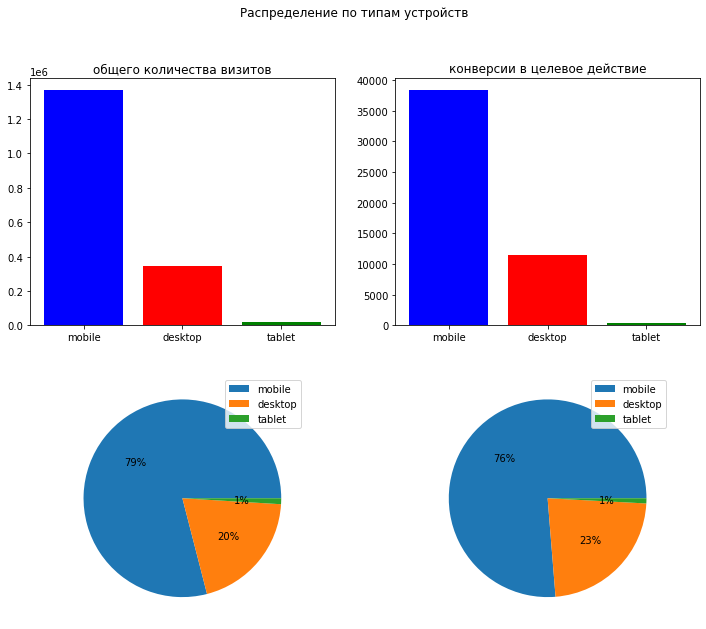

In [6]:
figure, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

x = stats_device_category['device_category']
y1 = stats_device_category['count_device_category']
y2 = stats_device_category['count_CR_device_category']
axis[0, 0].bar(x, y1, color=['blue', 'red', 'green'])
axis[0, 0].set_title("общего количества визитов")
axis[1, 0].pie(y1, labels=x, labeldistance=None, autopct = '%1.0f%%')
axis[1, 0].legend()
axis[0, 1].bar(x, y2, color=['blue', 'red', 'green'])
axis[0, 1].set_title("конверсии в целевое действие")
axis[1, 1].pie(y2, labels=x, labeldistance=None, autopct = '%1.0f%%')
axis[1, 1].legend()

figure.suptitle('Распределение по типам устройств')
plt.show();

Основное количество визитов было совершено с мобильных устройств - 79%, основное количество визитов 
с конверсией в целевое действие также было совершено с мобильных устройств. Процент практически аналогичен распределению
визитов.

### 4.2.  Визуализация категорийной переменной utm_medium - тип привлечения

In [7]:
stats_utm_medium = df_clean_res.groupby(['utm_medium'], as_index=False)[['session_id']].count()
stats_utm_medium = stats_utm_medium.rename(columns={'session_id': 'count_utm_medium'})

stats_utm_medium2 = df_clean_res.groupby(['utm_medium'], as_index=False)[['CR_result']].sum()
stats_utm_medium2 = stats_utm_medium2.rename(columns={'CR_result': 'count_CR_utm_medium'})
stats_utm_medium['count_CR_utm_medium'] = stats_utm_medium2['count_CR_utm_medium']

stats_utm_medium = stats_utm_medium.sort_values('count_utm_medium', ascending=False)
stats_utm_medium_show = stats_utm_medium[0:10]
stats_utm_medium_show

,utm_medium,count_utm_medium,count_CR_utm_medium
4,banner,525240,15109
12,cpc,399552,9541
30,other,277211,10544
13,cpm,229808,2519
40,referral,136851,8181
29,organic,55041,2101
16,email,28289,401
36,push,27710,840
47,stories,10476,126
14,cpv,7815,115


<Figure size 432x288 with 0 Axes>

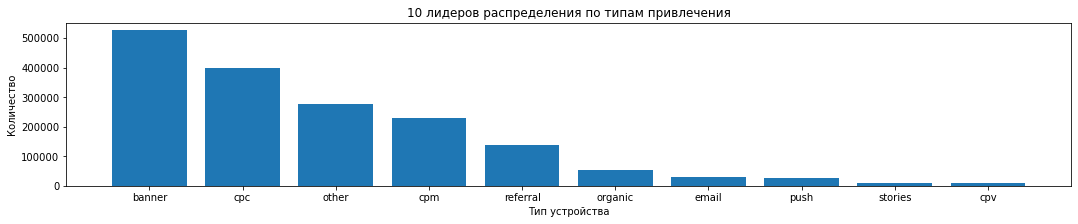

<Figure size 432x288 with 0 Axes>

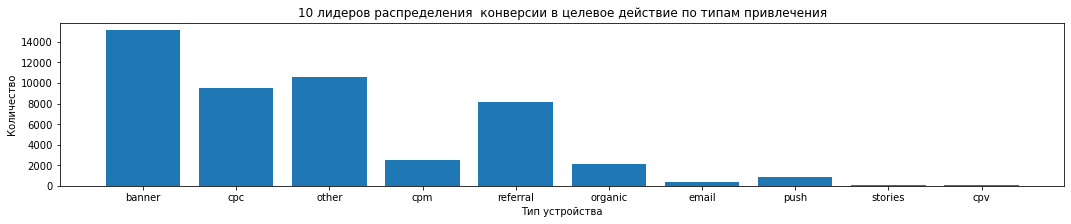

In [8]:
plt.figure(1)
plt.figure(figsize=(18, 3))
plt.bar(stats_utm_medium_show['utm_medium'], stats_utm_medium_show['count_utm_medium'])
plt.xlabel('Тип устройства')
plt.ylabel('Количество')
plt.title('10 лидеров распределения по типам привлечения')
plt.show();

plt.figure(2)
plt.figure(figsize=(18, 3))
plt.bar(stats_utm_medium_show['utm_medium'], stats_utm_medium_show['count_CR_utm_medium'])
plt.xlabel('Тип устройства')
plt.ylabel('Количество')
plt.title('10 лидеров распределения  конверсии в целевое действие по типам привлечения')
plt.show();

Основное количество визитов было по привлечению через баннер. 

Распределение по типам привлечения в части 10 лидеров практически совпадают по распределению по визитам  
с распределением с результатов конверсии в целевое действие

### 4.3.  Визуализация конверсии с целевое действие органического и платного трафика

In [9]:
df_org_traffic = df_clean_res[df_clean_res['org_traffic'] == 'органический трафик']
print(df_org_traffic.shape)
df_org_traffic.head(3)

(191892, 19)


,session_id,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,CR_result,org_traffic,advertising_social_NW,city_of_presence
543917,9057792867320659612.1639402846.1639402848,2.108932e+09,2021-12-13 16:40:48+00:00,2,bByPQxmDaMXgpHeypKSM,referral,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Samsung,412x915,Chrome,Russia,Krasnodar,0,0,органический трафик,иная реклама,другие города
543918,9076155647807932486.1639947501.1639947622,2.113207e+09,2021-12-20 00:00:22+00:00,1,bByPQxmDaMXgpHeypKSM,referral,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Realme,360x800,Chrome,Russia,Kazan,0,0,органический трафик,иная реклама,другие города
543919,9095760790533342483.1638565140.1638565254,2.117772e+09,2021-12-04 00:00:54+00:00,1,bByPQxmDaMXgpHeypKSM,referral,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Asus,486x1052,Chrome,Russia,Vidnoye,0,0,органический трафик,иная реклама,другие города


In [10]:
stats_org_traffic = df_clean_res.groupby(['org_traffic'], as_index=False)[['session_id']].count()
stats_org_traffic = stats_org_traffic.rename(columns={'session_id': 'count_org_traffic'})
stats_org_traffic2 = df_clean_res.groupby(['org_traffic'], as_index=False)[['CR_result']].sum()
stats_org_traffic2 = stats_org_traffic2.rename(columns={'CR_result': 'count_CR_org_traffic'})
stats_org_traffic['count_CR_org_traffic'] = stats_org_traffic2['count_CR_org_traffic']
stats_org_traffic

,org_traffic,count_org_traffic,count_CR_org_traffic
0,органический трафик,191892,10282
1,платный трафик,1540374,40032


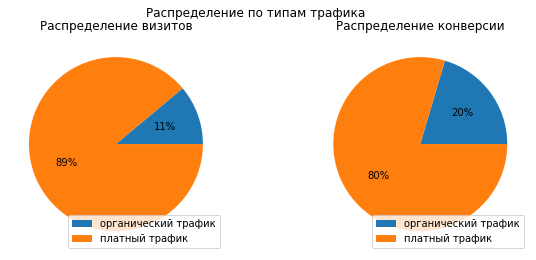

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)

ax1.pie(stats_org_traffic['count_org_traffic'], labels=stats_org_traffic['org_traffic'], labeldistance=None, autopct = '%1.0f%%')
ax1.legend(loc="lower right")
ax1.set_title('Распределение визитов')

ax2.pie(stats_org_traffic['count_CR_org_traffic'], labels=stats_org_traffic['org_traffic'], labeldistance=None, autopct = '%1.0f%%')
ax2.legend(loc="lower right")
ax2.set_title('Распределение конверсии')

fig.suptitle('Распределение по типам трафика  ')
plt.show()

Результат конверсии в органическом трафике практически в два раза выше, чем в платном

Что свидетельствует о большей эффективности данного типа рекламы

### 4.4.  Визуализация конверсии в целевое действие по городам и странам

In [36]:
stats_country = df_clean_res.groupby(['geo_country'], as_index=False)[['session_id']].count()
stats_country = stats_country.rename(columns={'session_id': 'count_country'})
stats_country2 = df_clean_res.groupby(['geo_country'], as_index=False)[['CR_result']].sum()
stats_country2 = stats_country2.rename(columns={'CR_result': 'count_CR_country'})
stats_country['count_CR_country'] = stats_country2['count_CR_country']
stats_country = stats_country.sort_values('count_country', ascending=False)
stats_country[0:5]

,geo_country,count_country,count_CR_country
116,Russia,1683494,49185
147,Ukraine,8455,199
150,United States,8141,64
15,Belarus,3432,59
70,Kazakhstan,2109,54


Учитывая явное преимущество России, исследование по странам нецелесообразно

In [37]:
stats_city = df_clean_res.groupby(['geo_city'], as_index=False)[['session_id']].count()
stats_city = stats_city.rename(columns={'session_id': 'count_city'})
stats_city2 = df_clean_res.groupby(['geo_city'], as_index=False)[['CR_result']].sum()
stats_city2 = stats_city2.rename(columns={'CR_result': 'count_CR_city'})
stats_city['count_CR_city'] = stats_city2['count_CR_city']
stats_city = stats_city.sort_values('count_city', ascending=False)
stats_city[0:5]

,geo_city,count_city,count_CR_city
1320,Moscow,817811,25022
1785,Saint Petersburg,278402,7113
2303,Yekaterinburg,33555,887
1014,Krasnodar,30260,1081
911,Kazan,27689,1139


In [102]:
print(stats_city.shape)

(2365, 3)


In [38]:
stats_city_show = stats_city[0:10]
stats_city_show

,geo_city,count_city,count_CR_city
1320,Moscow,817811,25022
1785,Saint Petersburg,278402,7113
2303,Yekaterinburg,33555,887
1014,Krasnodar,30260,1081
911,Kazan,27689,1139
1803,Samara,23433,727
1421,Nizhny Novgorod,20782,559
2133,Ufa,20283,639
1459,Novosibirsk,20115,509
1021,Krasnoyarsk,15283,376


<Figure size 432x288 with 0 Axes>

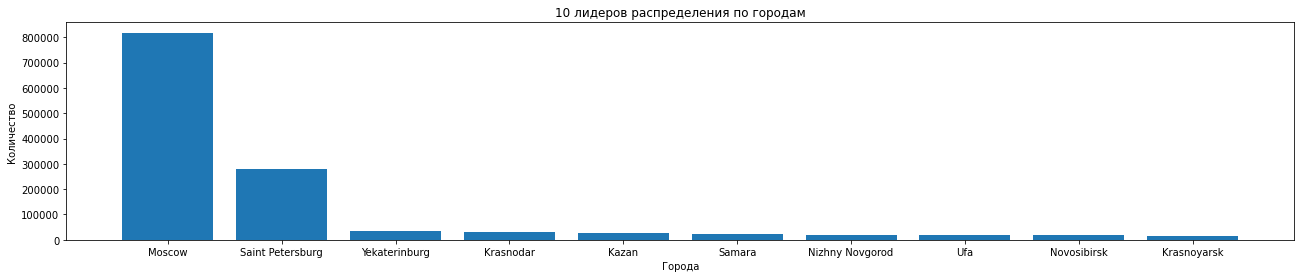

<Figure size 432x288 with 0 Axes>

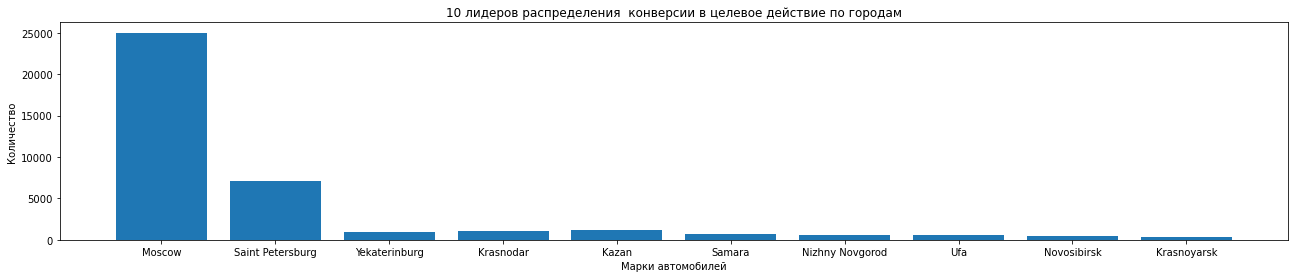

In [39]:
stats_city_show = stats_city[0:10]

plt.figure(1)
plt.figure(figsize=(22, 4))
plt.bar(stats_city_show['geo_city'], stats_city_show['count_city'])
plt.xlabel('Города')
plt.ylabel('Количество')
plt.title('10 лидеров распределения по городам')
plt.show();

plt.figure(2)
plt.figure(figsize=(22, 4))
plt.bar(stats_city_show['geo_city'], stats_city_show['count_CR_city'])
plt.xlabel('Марки автомобилей')
plt.ylabel('Количество')
plt.title('10 лидеров распределения  конверсии в целевое действие по городам')
plt.show();

График городов-лидеров подтверждает вывод о том, что абсолютными лидерами визитов и конверсии их в целевое действие
являются самые большие города России, "города-миллионники"

In [47]:
stats_city = df_clean_res.groupby(['city_of_presence'], as_index=False)[['session_id']].count()
stats_city = stats_city.rename(columns={'session_id': 'count_city'})
stats_city2 = df_clean_res.groupby(['city_of_presence'], as_index=False)[['CR_result']].sum()
stats_city2 = stats_city2.rename(columns={'CR_result': 'count_CR_city'})
stats_city['count_CR_city'] = stats_city2['count_CR_city']
stats_city = stats_city.sort_values('count_city', ascending=False)
stats_city

,city_of_presence,count_city,count_CR_city
0,Москва+Санкт-П,1096213,32135
1,другие города,636053,18179


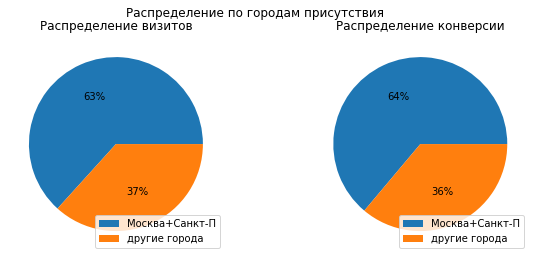

In [48]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)

ax1.pie(stats_city['count_city'], labels=stats_city['city_of_presence'], labeldistance=None, autopct = '%1.0f%%')
ax1.legend(loc="lower right")
ax1.set_title('Распределение визитов')

ax2.pie(stats_city['count_CR_city'], labels=stats_city['city_of_presence'], labeldistance=None, autopct = '%1.0f%%')
ax2.legend(loc="lower right")
ax2.set_title('Распределение конверсии')

fig.suptitle('Распределение по городам присутствия  ')
plt.show()

Результат конверсии по городам присутствия не отличается от результата по другим городам

Что свидетельствует о независимости результата конверсии от принадлежности к городам присутствия

### 4.5.  Визуализация конверсии в целевое действие по рекламе в соц сетях

In [18]:
stats_NW = df_clean_res.groupby(['advertising_social_NW'], as_index=False)[['session_id']].count()
stats_NW = stats_NW.rename(columns={'session_id': 'count_social_NW'})
stats_NW2 = df_clean_res.groupby(['advertising_social_NW'], as_index=False)[['CR_result']].sum()
stats_NW2 = stats_NW2.rename(columns={'CR_result': 'count_CR_social_NW'})
stats_NW['count_CR_social_NW'] = stats_NW2['count_CR_social_NW']
stats_NW

,advertising_social_NW,count_social_NW,count_CR_social_NW
0,иная реклама,1475986,46293
1,реклама в соц.сетях,256280,4021


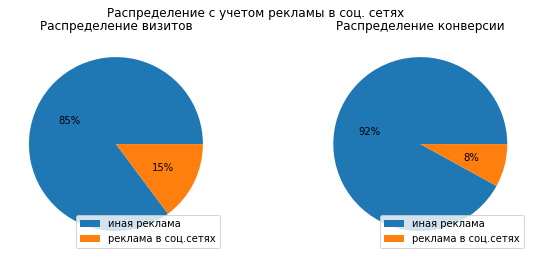

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)

ax1.pie(stats_NW['count_social_NW'], labels=stats_NW['advertising_social_NW'], labeldistance=None, autopct = '%1.0f%%')
ax1.legend(loc="lower right")
ax1.set_title('Распределение визитов')

ax2.pie(stats_NW['count_CR_social_NW'], labels=stats_NW['advertising_social_NW'], labeldistance=None, autopct = '%1.0f%%')
ax2.legend(loc="lower right")
ax2.set_title('Распределение конверсии')

fig.suptitle('Распределение c учетом рекламы в соц. сетях  ')
plt.show()

Результат конверсии по рекламе в соц.сетях почти в два раза ниже, чем по другим видам рекламы

Что свидетельствует о нецелесообразности развития данного способа рекламы продукта (услуги)

### 4.6.  Исследование лидеров продукта (по 10 лидеров)

###  4.6.1. Исследуем рекламные кампании, принесшие наибольший результат по визитам и конверсии - 'utm_campaign' 

In [110]:
df_clean_res[0:5]

,session_id,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,CR_result,org_traffic,advertising_social_NW,city_of_presence
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24 14:36:32+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0,0,платный трафик,иная реклама,другие города
1,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28 02:42:06+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0,0,платный трафик,иная реклама,другие города
2,9055462349345527315.1638536723.1638536723,2.108389e+09,2021-12-03 16:05:23+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Apple,390x844,Safari,Russia,Moscow,0,0,платный трафик,иная реклама,Москва+Санкт-П
3,9055487268745225369.1637983385.1637983385,2.108395e+09,2021-11-27 06:23:05+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Apple,320x568,Safari,Russia,Saint Petersburg,0,0,платный трафик,иная реклама,Москва+Санкт-П
4,9055491722626447422.1638119489.1638119489,2.108396e+09,2021-11-28 20:11:29+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x780,Chrome,Russia,Saint Petersburg,0,0,платный трафик,иная реклама,Москва+Санкт-П


In [20]:
df_clean_res = df_clean_res.astype(dtype={'utm_campaign': 'string'})

In [21]:
stats_utm_campaign = df_clean_res.groupby(['utm_campaign'], as_index=False)[['session_id']].count()
stats_utm_campaign = stats_utm_campaign.rename(columns={'session_id': 'count_utm_campaign'})

stats_utm_campaign2 = df_clean_res.groupby(['utm_campaign'], as_index=False)[['CR_result']].sum()
stats_utm_campaign2 = stats_utm_campaign2.rename(columns={'CR_result': 'count_CR_utm_campaign'})
stats_utm_campaign['count_CR_utm_campaign'] = stats_utm_campaign2['count_CR_utm_campaign']

stats_utm_campaign = stats_utm_campaign.sort_values('count_utm_campaign', ascending=False)
stats_utm_campaign_show = stats_utm_campaign[0:10]
stats_utm_campaign_show

,utm_campaign,count_utm_campaign,count_CR_utm_campaign
87,LTuZkdKfxRGVceoWkVyg,607922,25654
84,LEoPHuyFvzoNfnzGgfcd,321286,9348
39,FTjNLDyTrXaWYgZymFkV,234950,2447
256,gecBYcKZCPMcVYdSSzKP,133247,4545
192,XHNUiSKKGTEpSAlaVMFQ,23750,401
348,sbJRYgVfvcnqKJNDDYIr,19942,575
317,okTXSMadDkjvntEHzIjp,18405,77
92,LwJZxKuWmvOhPsaCeRjG,16846,285
364,vRLTQQKAsFQMxbcHGPhu,15845,499
146,SgIUDYUKnyWHVowUOqid,15784,373


Кампании лидеры конверсии совпадают с лидерами визитов

<Figure size 432x288 with 0 Axes>

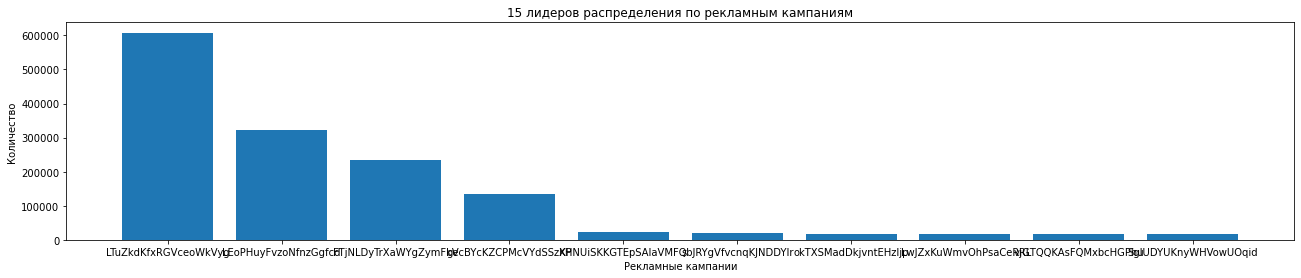

<Figure size 432x288 with 0 Axes>

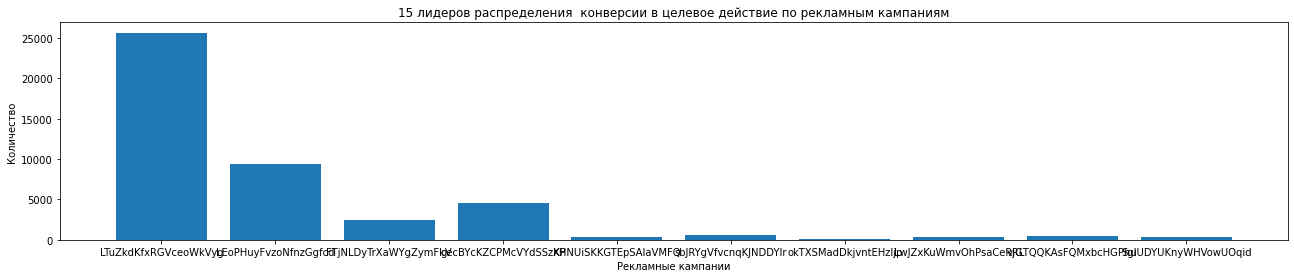

In [22]:
plt.figure(1)
plt.figure(figsize=(22, 4))
plt.bar(stats_utm_campaign_show['utm_campaign'], stats_utm_campaign_show['count_utm_campaign'])
plt.xlabel('Рекламные кампании')
plt.ylabel('Количество')
plt.title('15 лидеров распределения по рекламным кампаниям')
plt.show();

plt.figure(2)
plt.figure(figsize=(22, 4))
plt.bar(stats_utm_campaign_show['utm_campaign'], stats_utm_campaign_show['count_CR_utm_campaign'])
plt.xlabel('Рекламные кампании')
plt.ylabel('Количество')
plt.title('15 лидеров распределения  конверсии в целевое действие по рекламным кампаниям')
plt.show();

График рекламных кампаний показывает четверку явных лидеров. Особенно успешна была кампания - 'LTuZkdKfxRGVceoWkVyg',
как в части визитов, так и в части их конверсии в целевой результат

Установить явные признаки кампании не удалось

In [23]:
df = df_clean_res.query('utm_campaign=="LTuZkdKfxRGVceoWkVyg"')
df[0:10]

,session_id,client_id,visit_date,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,CR_sum,CR_result,org_traffic,advertising_social_NW,city_of_presence
184732,948502812665061192.1633427276.1633427276,2.208405e+08,2021-10-05 12:00:00+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,320x568,Safari,Russia,Tver,0,0,платный трафик,иная реклама,другие города
191391,1100240274910044288.1640728207.1640728207,2.561697e+08,2021-12-29 00:50:07+00:00,2,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,OnePlus,412x892,Chrome,Russia,Saint Petersburg,0,0,платный трафик,иная реклама,Москва+Санкт-П
191781,1109091283371586860.1624798815.1624798815,2.582304e+08,2021-06-27 16:00:00+00:00,3,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x812,Safari,Russia,Saint Petersburg,0,0,платный трафик,иная реклама,Москва+Санкт-П
200611,1315785244468263866.1631271869.1631271869,3.063551e+08,2021-09-10 14:00:00+00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x812,Safari,Russia,Moscow,0,0,платный трафик,иная реклама,Москва+Санкт-П
202691,1364914954463538089.1637595059.1637595059,3.177940e+08,2021-11-22 18:30:59+00:00,8,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x851,YaBrowser,Russia,Moscow,0,0,платный трафик,иная реклама,Москва+Санкт-П
202692,1364914954463538089.1638478637.1638478637,3.177940e+08,2021-12-02 23:57:17+00:00,9,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x851,YaBrowser,Russia,Moscow,0,0,платный трафик,иная реклама,Москва+Санкт-П
203402,1380043242326371104.1637518268.1637518268,3.213164e+08,2021-11-21 21:11:08+00:00,4,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,360x740,Chrome,Russia,Izhevsk,0,0,платный трафик,иная реклама,другие города
223290,184033135453208477.1638708623.1638708623,4.284855e+07,2021-12-05 15:50:23+00:00,2,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Huawei,360x780,Chrome,Russia,Novosibirsk,0,0,платный трафик,иная реклама,другие города
223291,184033135453208477.1638715082.1638715082,4.284855e+07,2021-12-05 17:38:02+00:00,3,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Huawei,360x780,Chrome,Russia,Novosibirsk,0,0,платный трафик,иная реклама,другие города
228144,1953231336916799142.1640792454.1640792454,4.547721e+08,2021-12-29 18:40:54+00:00,83,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Apple,1920x1080,Chrome,Russia,Moscow,0,0,платный трафик,иная реклама,Москва+Санкт-П


In [126]:
# Установить явные признаки кампании не удалось

for column in df:
    print('')
    print('Характеристика:', column)
    uniqvalue = df[column].nunique()
    print('Количество уникальных значений: ', uniqvalue)
    print('Список значений: ',  df[column].value_counts()) 


Характеристика: session_id
Количество уникальных значений:  607922
Список значений:  948502812665061192.1633427276.1633427276     1
4842695869766558103.1622190021.1622190021    1
4842702084587009089.1624912962.1624912962    1
4842767814763712141.1622118030.1622118030    1
4842838247941996952.1631715857.1631715857    1
                                            ..
3720557980628945379.1638009354.1638009354    1
3720777157094738144.1627719904.1627719904    1
3720865938364508066.1628514237.1628514237    1
3720865938364508066.1628519928.1628519928    1
9176716616208840927.1636662777.1636662777    1
Name: session_id, Length: 607922, dtype: int64

Характеристика: client_id
Количество уникальных значений:  400422
Список значений:  1.266575e+09    303
1.750498e+09    294
1.894772e+09    270
1.761942e+09    242
7.368596e+08    238
               ... 
1.592433e+09      1
1.592423e+09      1
1.592340e+09      1
1.592307e+09      1
2.136621e+09      1
Name: client_id, Length: 400422, dtype: int64

Список значений:  иная реклама           605171
реклама в соц.сетях      2751
Name: advertising_social_NW, dtype: int64

Характеристика: city_of_presence
Количество уникальных значений:  2
Список значений:  Москва+Санкт-П    414246
другие города     193676
Name: city_of_presence, dtype: int64


###  4.6.2.  Исследуем лидеров спроса по маркам авто

In [24]:
df_auto_without_none_= pd.read_csv('data/df_auto_without_none_.csv')

In [114]:
print(df_auto_without_none_.shape)
df_auto_without_none_.head()

(3508675, 9)


,session_id,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action,CR,model_auto
0,7750352294969115059.1640271109.1640271109,2021-12-23,41,event,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,0,fiat
1,885342191847998240.1640235807.1640235807,2021-12-23,49,event,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,0,volkswagen polo
2,3450086108837475701.1640265078.1640265078,2021-12-23,79,event,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,0,mercedes-benz cla-klasse
3,281215510786615563.1640245516.1640245516,2021-12-23,102,event,sberauto.com/cars/toyota?isnew=false&rental_ca...,quiz,quiz_show,0,toyota
4,4024492994895054107.1640269084.1640269084,2021-12-23,85,event,sberauto.com/cars/all/mercedes-benz/glc/f8f330...,quiz,quiz_show,0,mercedes-benz glc


In [25]:
stats_auto = df_auto_without_none_.groupby(['model_auto'], as_index=False)[['session_id']].count()
stats_auto = stats_auto.rename(columns={'session_id': 'count_model_auto'})

stats_auto2 = df_auto_without_none_.groupby(['model_auto'], as_index=False)[['CR']].sum()
stats_auto2 = stats_auto2.rename(columns={'CR': 'count_CR_model_auto'})
stats_auto['count_CR_model_auto'] = stats_auto2['count_CR_model_auto']

stats_auto = stats_auto.sort_values('count_model_auto', ascending=False)
stats_auto_show = stats_auto[0:15]
stats_auto_show

,model_auto,count_model_auto,count_CR_model_auto
120,skoda rapid,442513,6030
67,lada-vaz vesta,403910,5356
137,volkswagen polo,318075,4634
117,skoda karoq,194273,1305
82,mercedes-benz e-klasse,178467,1245
95,nissan qashqai,153153,891
94,nissan,130270,6
63,kia rio,90249,1438
96,nissan x-trail,85548,495
119,skoda octavia,77005,848


<Figure size 432x288 with 0 Axes>

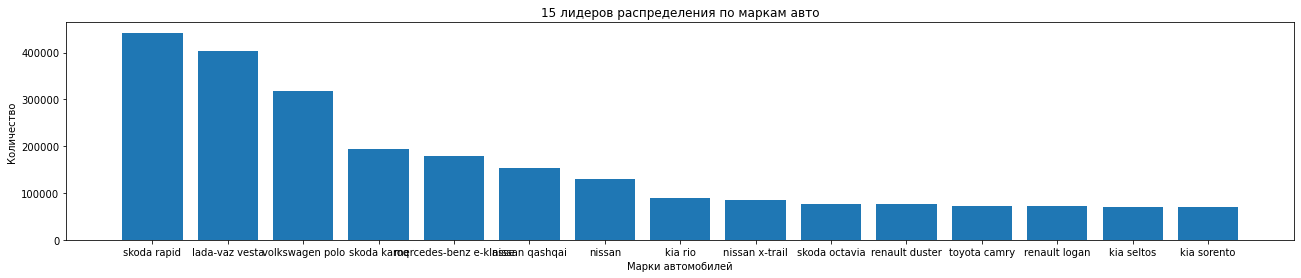

<Figure size 432x288 with 0 Axes>

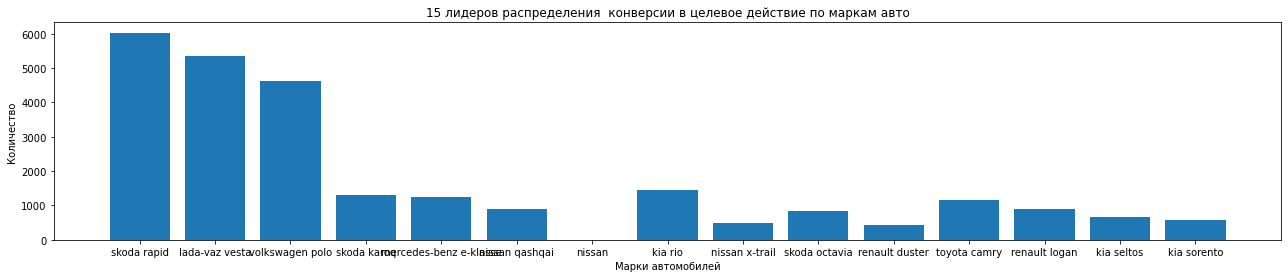

In [26]:
plt.figure(1)
plt.figure(figsize=(22, 4))
plt.bar(stats_auto_show['model_auto'], stats_auto_show['count_model_auto'])
plt.xlabel('Марки автомобилей')
plt.ylabel('Количество')
plt.title('15 лидеров распределения по маркам авто')
plt.show();

plt.figure(2)
plt.figure(figsize=(22, 4))
plt.bar(stats_auto_show['model_auto'], stats_auto_show['count_CR_model_auto'])
plt.xlabel('Марки автомобилей')
plt.ylabel('Количество')
plt.title('15 лидеров распределения  конверсии в целевое действие по маркам авто')
plt.show();

График лидеров подтверждает вывод о том, что абсолютными лидерами визитов и конверсии их в целевое действие
являются самые экономные модели - skoda, lada и volkswagen polo

В пятерку лидеров также попал mercedes-benz e-klasse, т.е. авто среднего класса стоимости

Десятка лидеров состоит из авто миним и среднего класса стоимости

Среди лидеров нет ни одной марки авто высокого класса стоимости

In [117]:
#  Проверим лидеров авто при распределении конверсии

stats_auto_ = stats_auto.sort_values('count_CR_model_auto', ascending=False)
stats_auto_[0:15]

,model_auto,count_model_auto,count_CR_model_auto
120,skoda rapid,442513,6030
67,lada-vaz vesta,403910,5356
137,volkswagen polo,318075,4634
63,kia rio,90249,1438
117,skoda karoq,194273,1305
82,mercedes-benz e-klasse,178467,1245
128,toyota camry,73149,1145
110,renault logan,72088,893
95,nissan qashqai,153153,891
119,skoda octavia,77005,848


Как видно из таблицы - все лидеры конверсии попали в список лидеров визитов

# 5.  MODELLING

##  5.1. Гипотеза - органический трафик не отличается от платного  с точки зрения CR  в целевые события

In [127]:
CR_org_traffic = df_clean_res[(df_clean_res.org_traffic != "платный трафик")].CR_result
CR_paid_traffic = df_clean_res[(df_clean_res.org_traffic == "платный трафик")].CR_result
print(len(CR_org_traffic), len(CR_paid_traffic))

191892 1540374


In [128]:
def test(df1,df2):
    return print('Проверка нормальности выборки (тест Шапиро) выборка  df1,   pvalue = ', stats.shapiro(df1)[1],'\n',
                 'Проверка нормальности выборки (тест Шапиро) выборка  df2,   pvalue = ', stats.shapiro(df2)[1],'\n',
                 'Проверка зависимости выборок (тест Левена),  выборки - df1, df2, pvalue = ', stats.levene(df1,df2)[1])    

In [129]:
test(CR_org_traffic,CR_paid_traffic)

Проверка нормальности выборки (тест Шапиро) выборка  df1,   pvalue =  0.0 
 Проверка нормальности выборки (тест Шапиро) выборка  df2,   pvalue =  0.0 
 Проверка зависимости выборок (тест Левена),  выборки - df1, df2, pvalue =  0.0


C:\Users\user\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Проверили явную информацию - данные не имеют нормального распределения (проверили по тексту Шапиро),
выборки не имеют зависимости друг от друга (проверили по тексту Левена), 
поэтому для проверки гипотезы выбираем  критерий Манна-Уитни

In [130]:
print(CR_org_traffic.shape)
CR_org_traffic.head()

(191892,)


543917    0
543918    0
543919    0
543920    0
543921    0
Name: CR_result, dtype: int64

### Нулевая гипотеза    -     органический трафик имеет большую конверсию в СR по отношению к платному трафику 

In [131]:
stats.mannwhitneyu(CR_org_traffic, CR_paid_traffic, alternative='greater')

MannwhitneyuResult(statistic=151870876266.0, pvalue=0.0)

### Нулевая гипотеза подтвердилась - 

органический трафик отличается от платного с точки зрения CR 
органический трафик имеет большую конверсию в СR по отношению к платному трафику

Данный вывод логичен, т.к. клиент, имеющий намерение арендовать автомобиль будет в первую очередь самостоятельно заниматься
поиском источников информации, в отличие от случайного приобретения по рекламной ссылке.

Вывод подтверждается также результатами Data Visualisation

##  5.2.  Гипотеза - трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR  в целевые события

In [132]:
CR_mobile_traffic = df_clean_res[(df_clean_res.device_category == 'mobile')].CR_result
CR_desctop_traffic = df_clean_res[(df_clean_res.device_category != 'mobile')].CR_result
print(len(CR_mobile_traffic), len(CR_desctop_traffic))

1368679 363587


In [133]:
test(CR_mobile_traffic,CR_desctop_traffic)

Проверка нормальности выборки (тест Шапиро) выборка  df1,   pvalue =  0.0 
 Проверка нормальности выборки (тест Шапиро) выборка  df2,   pvalue =  0.0 
 Проверка зависимости выборок (тест Левена),  выборки - df1, df2, pvalue =  1.179461167982722e-52


Проверили явную информацию - данные не имеют нормального распределения (проверили по тексту Шапиро),
выборки не имеют зависимости друг от друга (проверили по тексту Левена), 
поэтому для проверки гипотезы выбираем  критерий Манна-Уитни

In [134]:
stats.mannwhitneyu(CR_mobile_traffic, CR_desctop_traffic, alternative='less')

MannwhitneyuResult(statistic=247626406590.5, pvalue=5.943377437081339e-53)

### Нулевая гипотеза подтвердилась - 

- трафик с мобильных устройств отличается от трафика с десктопных устройств с точки зрения CR 
- трафик с мобильных устройств меньше конвертируется в СR по отношению к трафику с десктопных устройств

Данный вывод логичен, т.к. сделка достаточно существенная для клиентов и оценка ее с помощью десктопного устройства
означает для клиента большее удобство рассмотрения.

Следует также учитывать результаты по Data Visualisation, из которых видно, что при этом общее количество визитов и 
конверсий с мобильных устройств значительно выше, чем с десктопных

## 5.3.  Гипотеза - трафик из городов присутствия не отличается от трафика из иных регионов с точки зрения CR  в целевые события

In [135]:
CR_cities_presence_traffic = df_clean_res[(df_clean_res.city_of_presence != 'другие города')].CR_result
CR_other_cities_traffic = df_clean_res[(df_clean_res.city_of_presence == 'другие города')].CR_result
print(len(CR_cities_presence_traffic), len(CR_other_cities_traffic))

1096213 636053


In [136]:
test(CR_cities_presence_traffic,CR_other_cities_traffic)

Проверка нормальности выборки (тест Шапиро) выборка  df1,   pvalue =  0.0 
 Проверка нормальности выборки (тест Шапиро) выборка  df2,   pvalue =  0.0 
 Проверка зависимости выборок (тест Левена),  выборки - df1, df2, pvalue =  0.005579994889587972


Проверили явную информацию - данные не имеют нормального распределения (проверили по тексту Шапиро),
выборки не имеют зависимости друг от друга (проверили по тексту Левена), 
поэтому для проверки гипотезы выбираем  критерий Манна-Уитни

In [137]:
stats.mannwhitneyu(CR_cities_presence_traffic,CR_other_cities_traffic, alternative='greater')

MannwhitneyuResult(statistic=348880537158.5, pvalue=0.002790013540775209)

### Нулевая гипотеза подтвердилась - 

- трафик из городов присутствия отличается от трафика из других городов с точки зрения CR 
- трафик из городов присутствия больше конвертируется в СR по отношению к трафику из других городов

Данный вывод логичен, т.к. и по результатам по Data Visualisation видно, что общее количество визитов и 
конверсий из городов присутствия значительно выше, чем с десктопных, однако также заметно, что и разница в конверсиях незначительная

## 5.4.  Гипотеза - реклама в соц.сетях дает больше конверсии CR  в целевые события, чем иные виды рекламы

In [138]:
CR_advertising_social = df_clean_res[(df_clean_res.advertising_social_NW != 'иная реклама')].CR_result
CR_advertising_other = df_clean_res[(df_clean_res.advertising_social_NW == 'иная реклама')].CR_result
print(len(CR_advertising_social), len(CR_advertising_other))

256280 1475986


In [139]:
test(CR_advertising_social, CR_advertising_other)

Проверка нормальности выборки (тест Шапиро) выборка  df1,   pvalue =  0.0 
 Проверка нормальности выборки (тест Шапиро) выборка  df2,   pvalue =  0.0 
 Проверка зависимости выборок (тест Левена),  выборки - df1, df2, pvalue =  0.0


Проверили явную информацию - данные не имеют нормального распределения (проверили по тексту Шапиро),
выборки не имеют зависимости друг от друга (проверили по тексту Левена), 
поэтому для проверки гипотезы выбираем  критерий Манна-Уитни

In [140]:
stats.mannwhitneyu(CR_advertising_social, CR_advertising_other, alternative='greater')

MannwhitneyuResult(statistic=186168330873.0, pvalue=1.0)

### Нулевая гипотеза не подтвердилась - 

- реклама в соц.сетях дает меньше конверсии CR  в целевые события, чем иные виды рекламы

Данный вывод логичен и подтверждается, в т.ч. результатами по Data Visualisation

Вывод -   нет необходимости увеличивать свое присутствие в соц.сетях и давать больше рекламы в ней

##  5.5. Исследование спроса модели автомобиля

In [141]:
# Группируем по марке и модели авто и сортируем по убыванию

In [143]:
df_prepared_auto= pd.read_csv('data/df_prepared_auto.csv')

In [144]:
df_ = df_prepared_auto.groupby(['model_auto']).size().reset_index(name='model_count')
df_auto = df_.sort_values(by = 'model_count',ascending=False)
print(df_auto.shape)
df_auto.head()

(147, 2)


,model_auto,model_count
97,none,12217738
121,skoda rapid,442513
67,lada-vaz vesta,403910
138,volkswagen polo,318075
118,skoda karoq,194273


In [145]:
# Группируем по двум критериям - количество визитов на модель и по CR и сортируем по количеству визитов

df_auto_CR = df_auto_without_none_.groupby(['model_auto', 'CR']).size().reset_index(name='model_count').sort_values(by = 'model_count',ascending=False)
print(df_auto_CR.shape)
df_auto_CR.head(20)

(223, 3)


,model_auto,CR,model_count
181,skoda rapid,0,436483
96,lada-vaz vesta,0,398554
209,volkswagen polo,0,313441
175,skoda karoq,0,192968
118,mercedes-benz e-klasse,0,177222
141,nissan qashqai,0,152262
139,nissan,0,130264
88,kia rio,0,88811
143,nissan x-trail,0,85053
164,renault duster,0,76258


#### Таким образом наибольшим спросом пользуются авто эконом класса

In [146]:
# Группируем по двум критериям - количество визитов на модель и по CR и сортируем по убыванию (в первую очередь - по CR)

df_ = df_prepared_auto.groupby(['model_auto', 'CR']).size().reset_index(name='model_count').sort_values(['CR','model_count'], ascending=[False, False])
print(df_.shape)
df_.head(30)

(225, 3)


,model_auto,CR,model_count
146,none,1,73286
184,skoda rapid,1,6030
97,lada-vaz vesta,1,5356
212,volkswagen polo,1,4634
89,kia rio,1,1438
178,skoda karoq,1,1305
119,mercedes-benz e-klasse,1,1245
197,toyota camry,1,1145
169,renault logan,1,893
142,nissan qashqai,1,891


In [147]:
df_1 = df_prepared_auto.groupby(['session_id', 'model_auto']).size().reset_index(name='model_count').sort_values(['model_count'], ascending=False)
df_2 = df_1.groupby(['session_id']).size().reset_index(name='model_name_count')
df_3 = df_2.sort_values(by = 'model_name_count',ascending=False)
print(df_3.shape)
df_3.head(20)

(1734610, 2)


,session_id,model_name_count
600626,3879583418248804484.1638961593.1638961593,42
304583,2463753728364584753.1635144949.1635144949,39
881661,5223902293496830272.1634029538.1634029538,38
124137,1598186795953179375.1635928815.1635928815,35
560589,3688799725426015856.1637562356.1637562356,33
726646,4485141796601492709.1638954213.1638954213,30
1652207,8909635835841468826.1634458412.1634458412,29
863330,5136600099592452622.1634843149.1634843155,29
552462,36493651553398042.1634053406.1634053406,29
386723,2855601251394296590.1636117215.1636117215,28


Данная выборка говорит о том, что присоединять модель авто к id нецелесообразно, т.к. во время визитов рассматривались
разные автомобили

In [148]:
####   Можно еще добавить цену авто и исследовать доп группировку по стоимости авто (по классам стоимости)
#   и отдельно исследовать запросы по дорогим автомобилям

# 6. ИТОГОВЫЕ ВЫВОДЫ

## 6.1. Проверка гипотез

###  6.1.1. Органический трафик не отличается от платного с точки зрения CR в целевые события

п.5.1., п.4.3.

#### Органический трафик отличается от платного с точки зрения CR:     органический трафик имеет большую конверсию в СR по отношению к платному трафику

Данный вывод логичен, т.к. клиент, имеющий намерение арендовать автомобиль будет в первую очередь самостоятельно заниматься поиском источников информации, в отличие от случайного приобретения по рекламной ссылке. Вывод подтверждается также результатами Data Visualisation (п.4.3.)

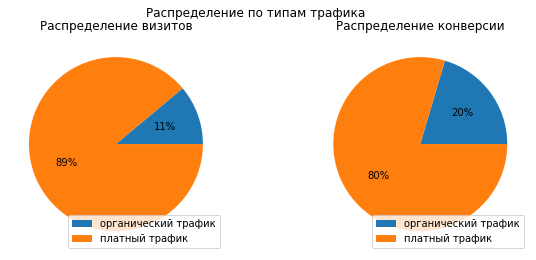

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)

ax1.pie(stats_org_traffic['count_org_traffic'], labels=stats_org_traffic['org_traffic'], labeldistance=None, autopct = '%1.0f%%')
ax1.legend(loc="lower right")
ax1.set_title('Распределение визитов')

ax2.pie(stats_org_traffic['count_CR_org_traffic'], labels=stats_org_traffic['org_traffic'], labeldistance=None, autopct = '%1.0f%%')
ax2.legend(loc="lower right")
ax2.set_title('Распределение конверсии')

fig.suptitle('Распределение по типам трафика  ')
plt.show()

Результат конверсии в органическом трафике практически в два раза выше, чем в платном

Что свидетельствует о большей эффективности данного типа рекламы

###  6.1.2. Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR в целевые события

п.5.2., 4.1.

#### трафик с мобильных устройств отличается от трафика с десктопных устройств с точки зрения CR, трафик с мобильных устройств меньше конвертируется в СR по отношению к трафику с десктопных устройств

Данный вывод логичен, т.к. сделка достаточно существенная для клиентов и оценка ее с помощью десктопного устройства означает для клиента большее удобство рассмотрения. Следует также учитывать результаты по Data Visualisation, из которых видно, что при этом общее количество визитов и конверсий с мобильных устройств значительно выше, чем с десктопных

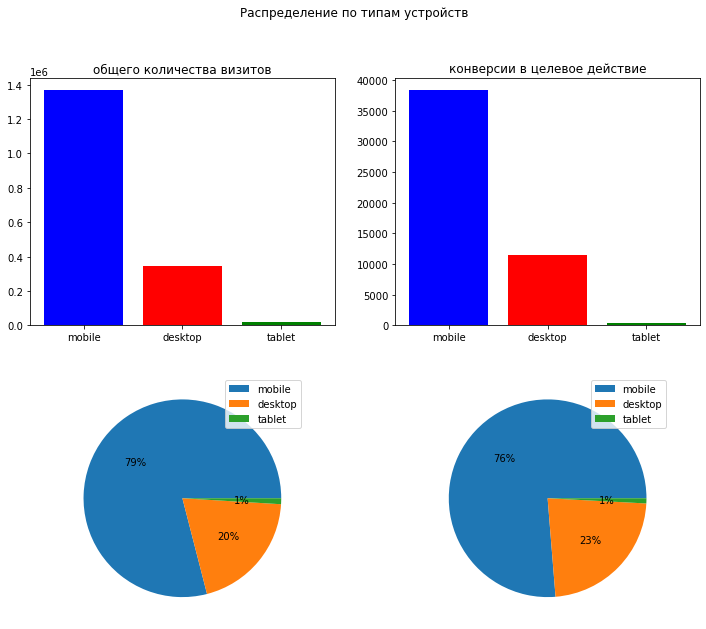

In [28]:
figure, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

x = stats_device_category['device_category']
y1 = stats_device_category['count_device_category']
y2 = stats_device_category['count_CR_device_category']
axis[0, 0].bar(x, y1, color=['blue', 'red', 'green'])
axis[0, 0].set_title("общего количества визитов")
axis[1, 0].pie(y1, labels=x, labeldistance=None, autopct = '%1.0f%%')
axis[1, 0].legend()
axis[0, 1].bar(x, y2, color=['blue', 'red', 'green'])
axis[0, 1].set_title("конверсии в целевое действие")
axis[1, 1].pie(y2, labels=x, labeldistance=None, autopct = '%1.0f%%')
axis[1, 1].legend()

figure.suptitle('Распределение по типам устройств')
plt.show();

Основное количество визитов было совершено с мобильных устройств - 79%, основное количество визитов 
с конверсией в целевое действие также было совершено с мобильных устройств. Процент практически аналогичен распределению
визитов.

###  6.1.3. Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR в целевые события

п.5.3. 

#### Трафик из городов присутствия отличается от трафика из других городов с точки зрения CR, трафик из городов присутствия больше конвертируется в СR по отношению к трафику из других городов
Данный вывод логичен, т.к. и по результатам по Data Visualisation видно, что общее количество визитов и конверсий из городов присутствия значительно выше, чем из других городов, однако также заметно, что и разница в конверсиях незначительная

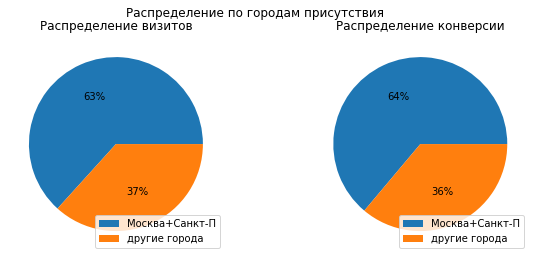

In [49]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)

ax1.pie(stats_city['count_city'], labels=stats_city['city_of_presence'], labeldistance=None, autopct = '%1.0f%%')
ax1.legend(loc="lower right")
ax1.set_title('Распределение визитов')

ax2.pie(stats_city['count_CR_city'], labels=stats_city['city_of_presence'], labeldistance=None, autopct = '%1.0f%%')
ax2.legend(loc="lower right")
ax2.set_title('Распределение конверсии')

fig.suptitle('Распределение по городам присутствия  ')
plt.show()

Результат конверсии по городам присутствия практически не отличается от результата по другим городам. Что свидетельствует о незначительности результата конверсии от принадлежности к городам присутствия

##  6.2. Другие вопросы продуктовой команды

###  6.2.1. Из каких источников/кампаний/устройств/локаций к нам идет самый целевой трафик (и с точки зрения обьема трафика и с точки зрения CR)

#### Источников - п.4.2.  Основное количество визитов было по привлечению через баннер. 
Распределение по типам привлечения в части 10 лидеров практически совпадают по распределению по визитам  
с распределением с результатов конверсии в целевое действие

#### Кампаний -п. 4.6.1. График рекламных кампаний показывает четверку явных лидеров. Особенно успешна была кампания - 'LTuZkdKfxRGVceoWkVyg',
как в части визитов, так и в части их конверсии в целевой результат
Установить явные признаки кампании не удалось

#### Устройств - п.4.1.   Основное количество визитов было совершено с мобильных устройств - 79%, основное количество визитов с конверсией в целевое действие также было совершено с мобильных устройств. 
Процент практически аналогичен распределению визитов. График приведен в п.6.1.2.

####  Локаций - п.4.4. График городов-лидеров подтверждает вывод о том, что абсолютными лидерами визитов и конверсии их в целевое действие являются самые большие города России, "города-миллионники"

<Figure size 432x288 with 0 Axes>

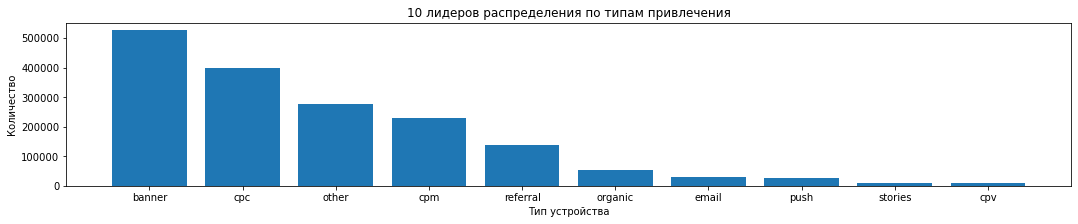

<Figure size 432x288 with 0 Axes>

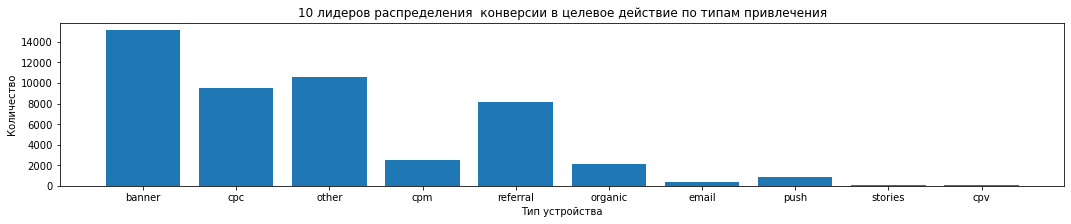

In [34]:
plt.figure(1)
plt.figure(figsize=(18, 3))
plt.bar(stats_utm_medium_show['utm_medium'], stats_utm_medium_show['count_utm_medium'])
plt.xlabel('Тип устройства')
plt.ylabel('Количество')
plt.title('10 лидеров распределения по типам привлечения')
plt.show();

plt.figure(2)
plt.figure(figsize=(18, 3))
plt.bar(stats_utm_medium_show['utm_medium'], stats_utm_medium_show['count_CR_utm_medium'])
plt.xlabel('Тип устройства')
plt.ylabel('Количество')
plt.title('10 лидеров распределения  конверсии в целевое действие по типам привлечения')
plt.show();

<Figure size 432x288 with 0 Axes>

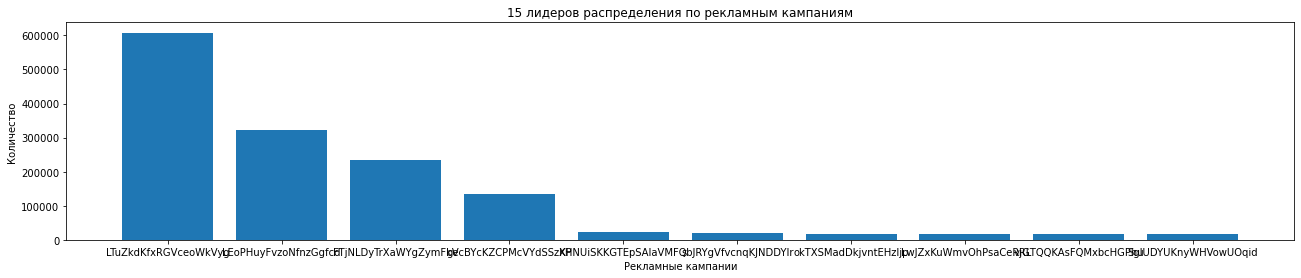

<Figure size 432x288 with 0 Axes>

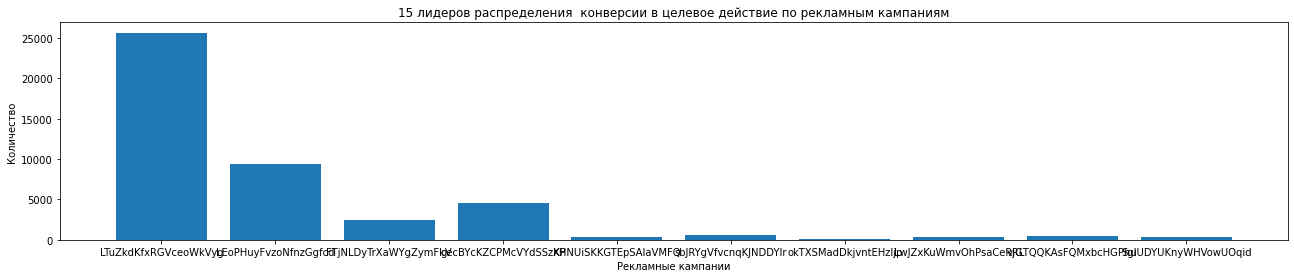

In [33]:
plt.figure(1)
plt.figure(figsize=(22, 4))
plt.bar(stats_utm_campaign_show['utm_campaign'], stats_utm_campaign_show['count_utm_campaign'])
plt.xlabel('Рекламные кампании')
plt.ylabel('Количество')
plt.title('15 лидеров распределения по рекламным кампаниям')
plt.show();

plt.figure(2)
plt.figure(figsize=(22, 4))
plt.bar(stats_utm_campaign_show['utm_campaign'], stats_utm_campaign_show['count_CR_utm_campaign'])
plt.xlabel('Рекламные кампании')
plt.ylabel('Количество')
plt.title('15 лидеров распределения  конверсии в целевое действие по рекламным кампаниям')
plt.show();

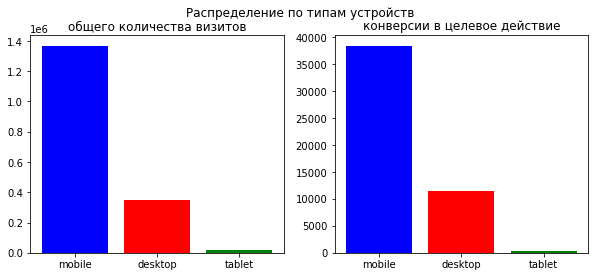

In [45]:
figure, axis = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

x = stats_device_category['device_category']
y1 = stats_device_category['count_device_category']
y2 = stats_device_category['count_CR_device_category']
axis[0].bar(x, y1, color=['blue', 'red', 'green'])
axis[0].set_title("общего количества визитов")
axis[1].bar(x, y2, color=['blue', 'red', 'green'])
axis[1].set_title("конверсии в целевое действие")
figure.suptitle('Распределение по типам устройств')
plt.show();

<Figure size 432x288 with 0 Axes>

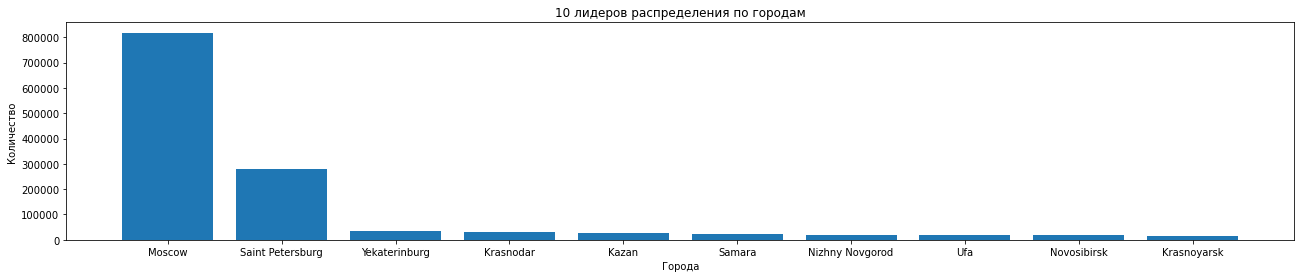

<Figure size 432x288 with 0 Axes>

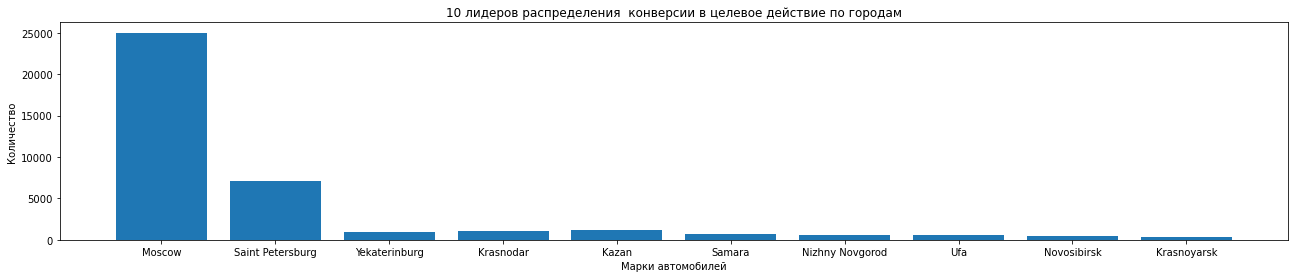

In [40]:
stats_city_show = stats_city[0:10]

plt.figure(1)
plt.figure(figsize=(22, 4))
plt.bar(stats_city_show['geo_city'], stats_city_show['count_city'])
plt.xlabel('Города')
plt.ylabel('Количество')
plt.title('10 лидеров распределения по городам')
plt.show();

plt.figure(2)
plt.figure(figsize=(22, 4))
plt.bar(stats_city_show['geo_city'], stats_city_show['count_CR_city'])
plt.xlabel('Марки автомобилей')
plt.ylabel('Количество')
plt.title('10 лидеров распределения  конверсии в целевое действие по городам')
plt.show();

###  6.2.2. Какие авто пользуются наибольным спросом? У каких авто самый лучший показатель CR в целевые события?

п.4.6.2., п.5.5.
#### Наибольшим спросом пользуются авто эконом класса
#### График лидеров подтверждает вывод о том, что абсолютными лидерами визитов и конверсии их в целевое действие являются самые экономные модели - skoda, lada и volkswagen polo

В пятерку лидеров также попал mercedes-benz e-klasse, т.е. авто среднего класса стоимости. Десятка лидеров состоит из авто миним и среднего класса стоимости. Среди лидеров нет ни одной марки авто высокого класса стоимости.

In [30]:
df_auto_CR = df_auto_without_none_.groupby(['model_auto', 'CR']).size().reset_index(name='model_count').sort_values(by = 'model_count',ascending=False)
print(df_auto_CR.shape)
df_auto_CR.head(5)

(223, 3)


,model_auto,CR,model_count
181,skoda rapid,0,436483
96,lada-vaz vesta,0,398554
209,volkswagen polo,0,313441
175,skoda karoq,0,192968
118,mercedes-benz e-klasse,0,177222


<Figure size 432x288 with 0 Axes>

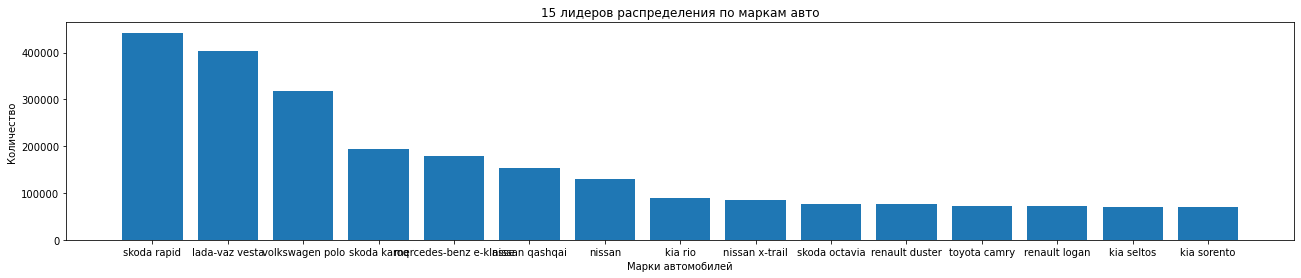

<Figure size 432x288 with 0 Axes>

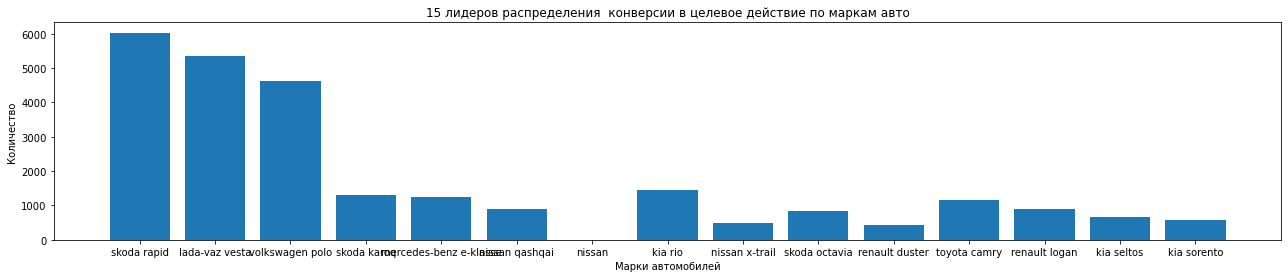

In [32]:
plt.figure(1)
plt.figure(figsize=(22, 4))
plt.bar(stats_auto_show['model_auto'], stats_auto_show['count_model_auto'])
plt.xlabel('Марки автомобилей')
plt.ylabel('Количество')
plt.title('15 лидеров распределения по маркам авто')
plt.show();

plt.figure(2)
plt.figure(figsize=(22, 4))
plt.bar(stats_auto_show['model_auto'], stats_auto_show['count_CR_model_auto'])
plt.xlabel('Марки автомобилей')
plt.ylabel('Количество')
plt.title('15 лидеров распределения  конверсии в целевое действие по маркам авто')
plt.show();

###  6.2.3. Стоит ли нам увеличивать свое присутствие в соц.сетях и давать там больше рекламы?

п.4.5., п.5.4.

#### Реклама в соц.сетях дает меньше конверсии CR в целевые события, чем иные виды рекламы. Вывод - нет необходимости увеличивать свое присутствие в соц.сетях и давать больше рекламы в ней.
Данный вывод логичен и подтверждается, в т.ч. результатами по Data Visualisation

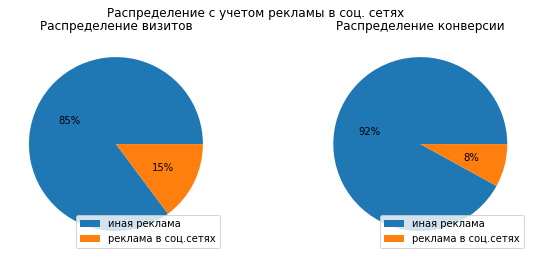

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharey=True)

ax1.pie(stats_NW['count_social_NW'], labels=stats_NW['advertising_social_NW'], labeldistance=None, autopct = '%1.0f%%')
ax1.legend(loc="lower right")
ax1.set_title('Распределение визитов')

ax2.pie(stats_NW['count_CR_social_NW'], labels=stats_NW['advertising_social_NW'], labeldistance=None, autopct = '%1.0f%%')
ax2.legend(loc="lower right")
ax2.set_title('Распределение конверсии')

fig.suptitle('Распределение c учетом рекламы в соц. сетях  ')
plt.show()

Результат конверсии по рекламе в соц.сетях почти в два раза ниже, чем по другим видам рекламы. Что свидетельствует о нецелесообразности развития данного способа рекламы продукта (услуги).